# CAPSTONE PROJECT BENGKEL KODING DATA SCIENCE
## Dataset : Obesitas

## Nama : Firman Naufal Aryaputra
## NIM : A11.2022.14181
## Kelas : DS01


# 1.Import Library

In [6]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Others
import warnings
warnings.filterwarnings('ignore')

# Set random state for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1. Analisis Data Eksploratori (EDA)

### 1.1 Memuat Data dan Menampilkan Informasi Dasar

In [7]:
df = pd.read_csv('C:\Backup D\Kuliah\SEM 6\Benkod\Capstone_Bengkod_DS01_Firman\ObesityDataSet.csv')
print("=" * 30)
print("INFORMASI UMUM DATASET")
print("=" * 30)
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"\nNama kolom: {list(df.columns)}")

INFORMASI UMUM DATASET
Jumlah baris: 2111
Jumlah kolom: 17

Nama kolom: ['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


In [8]:
print("Menampilkan 5 data dari dataset")
df.head(5)

Menampilkan 5 data dari dataset


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
print("\n" + "=" * 60)
print("INFORMASI TIPE DATA")
print("=" * 60)
print(df.info())


INFORMASI TIPE DATA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                        

In [10]:
print("\n" + "=" * 60)
print("DESKRIPSI STATISTIK VARIABEL NUMERIK")
print("=" * 60)
display(df.describe())


DESKRIPSI STATISTIK VARIABEL NUMERIK


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


### 2.2 Nilai yang Hilang dan Analisis Kualitas Data

In [11]:
# Periksa nilai yang hilang dan '?' sebagai indikator yang hilang
print("=" * 50)
print("ANALISIS Missing Values")
print("=" * 50)
missing_explicit = df.isnull().sum()
print("Missing values (NaN):")
print(missing_explicit[missing_explicit > 0])

ANALISIS Missing Values
Missing values (NaN):
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
dtype: int64


In [12]:
# Periksa '?' sebagai nilai yang hilang
print("\nNilai yang hilang direpresentasikan sebagai '?':")
for col in df.columns:
    question_count = (df[col] == '?').sum()
    if question_count > 0:
        print(f"{col}: {question_count} ('?' values)")


Nilai yang hilang direpresentasikan sebagai '?':
Age: 8 ('?' values)
Gender: 13 ('?' values)
Height: 10 ('?' values)
Weight: 8 ('?' values)
CALC: 15 ('?' values)
FAVC: 11 ('?' values)
FCVC: 10 ('?' values)
NCP: 10 ('?' values)
SCC: 8 ('?' values)
SMOKE: 8 ('?' values)
CH2O: 9 ('?' values)
family_history_with_overweight: 10 ('?' values)
FAF: 11 ('?' values)
TUE: 6 ('?' values)
CAEC: 7 ('?' values)
MTRANS: 6 ('?' values)


In [13]:
# Periksa nilai unik untuk setiap kolom, tangani potensi tipe campuran untuk pengurutan
print("\n" + "=" * 60)
print("NILAI UNIK PER KOLOM")
print("=" * 60)
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} nilai unik")
    if unique_vals <= 10:
        try:
            # Mencoba mengurutkan, mengonversi elemen ke string hanya untuk tujuan tampilan/pengurutan
            # Ini mencegah TypeError jika ada tipe campuran seperti float (NaN) dan string
            print(f" Values: {sorted([str(item) for item in df[col].unique()])}")
        except Exception as e:
            print(f" Tidak dapat menampilkan nilai unik untuk pengurutan: {e}")


NILAI UNIK PER KOLOM
Age: 1394 nilai unik
Gender: 3 nilai unik
 Values: ['?', 'Female', 'Male', 'nan']
Height: 1562 nilai unik
Weight: 1518 nilai unik
CALC: 5 nilai unik
 Values: ['?', 'Always', 'Frequently', 'Sometimes', 'nan', 'no']
FAVC: 3 nilai unik
 Values: ['?', 'nan', 'no', 'yes']
FCVC: 808 nilai unik
NCP: 637 nilai unik
SCC: 3 nilai unik
 Values: ['?', 'nan', 'no', 'yes']
SMOKE: 3 nilai unik
 Values: ['?', 'nan', 'no', 'yes']
CH2O: 1263 nilai unik
family_history_with_overweight: 3 nilai unik
 Values: ['?', 'nan', 'no', 'yes']
FAF: 1186 nilai unik
TUE: 1130 nilai unik
CAEC: 5 nilai unik
 Values: ['?', 'Always', 'Frequently', 'Sometimes', 'nan', 'no']
MTRANS: 6 nilai unik
 Values: ['?', 'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking', 'nan']
NObeyesdad: 7 nilai unik
 Values: ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


In [14]:
# Check for duplicates
print("\n" + "=" * 60)
print("ANALISIS DATA DUPLIKAT")
print("=" * 60)
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")
if duplicates > 0:
    print("\nContoh baris duplikat:")
    display(df[df.duplicated()].head())


ANALISIS DATA DUPLIKAT
Jumlah baris duplikat: 18

Contoh baris duplikat:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21,Female,1.52,42,Sometimes,no,3,1,no,no,1,no,0,0,Frequently,Public_Transportation,Insufficient_Weight
174,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
179,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
184,21,Male,1.62,70,Sometimes,yes,2,1,no,no,3,no,1,0,no,Public_Transportation,Overweight_Level_I
309,16,Female,1.66,58,no,no,2,1,no,no,1,no,0,1,Sometimes,Walking,Normal_Weight


### 2.3 Analisis Variabel Target

In [15]:
# Analyze target variable distribution
print("=" * 60)
print("DISTRIBUSI TARGET VARIABLE (NObeyesdad)")
print("=" * 60)

target_dist = df['NObeyesdad'].value_counts()
target_pct = df['NObeyesdad'].value_counts(normalize=True) * 100

target_summary = pd.DataFrame({
    'Count': target_dist,
    'Percentage': target_pct.round(2)
})

print(target_summary)

DISTRIBUSI TARGET VARIABLE (NObeyesdad)
                     Count  Percentage
NObeyesdad                            
Obesity_Type_I         351       16.63
Obesity_Type_III       324       15.35
Obesity_Type_II        297       14.07
Overweight_Level_I     290       13.74
Overweight_Level_II    290       13.74
Normal_Weight          287       13.60
Insufficient_Weight    272       12.88


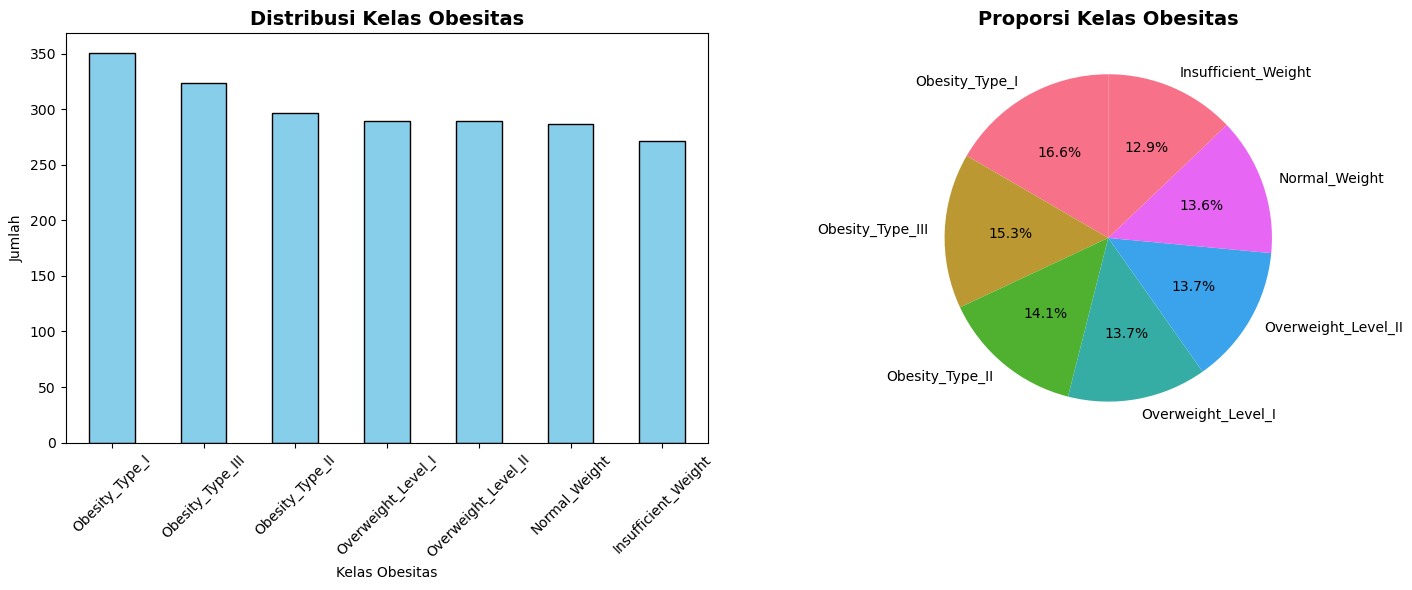

In [16]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
target_dist.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Distribusi Kelas Obesitas', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Kelas Obesitas')
axes[0].set_ylabel('Jumlah')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(target_dist.values, labels=target_dist.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Proporsi Kelas Obesitas', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [17]:
# Check for class imbalance
min_class = target_dist.min()
max_class = target_dist.max()
imbalance_ratio = max_class / min_class
print(f"\nImbalance ratio: {imbalance_ratio:.2f} (ideal: close to 1.0)")
if imbalance_ratio > 2:
    print("⚠️ Dataset memiliki ketidakseimbangan kelas yang signifikan")
else:
    print("✅ Dataset relatif seimbang")


Imbalance ratio: 1.29 (ideal: close to 1.0)
✅ Dataset relatif seimbang


### 2.4 Visualisasi Data

In [18]:
# Mengonversi kolom yang seharusnya berupa angka tetapi mungkin berupa 'objek'
# karena tipe '?' atau campuran, mengonversi '?'/'nan' menjadi NaN aktual
for col in ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') # Kesalahan pemaksaan akan mengubah nilai non-numerik menjadi NaN

# Sekarang identifikasi ulang kolom numerik dan kategoris berdasarkan tipe yang diperbarui
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist() 

# Periksa apakah kolom numerik sekarang diidentifikasi dengan benar
print(f"\nUpdated Numeric columns: {numeric_cols}")
print(f"Updated Categorical columns: {categorical_cols}")

# Hapus target dari kategoris untuk analisis (jika ada dan bersifat kategoris)
if 'NObeyesdad' in categorical_cols:
    categorical_cols.remove('NObeyesdad')

print(f"\nUpdated Feature columns:")
print(f"Numeric features: {numeric_cols}")
print(f"Categorical features: {categorical_cols}")


Updated Numeric columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Updated Categorical columns: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

Updated Feature columns:
Numeric features: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical features: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']


In [19]:
# Identifikasi kolom numerik dan kategoris
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# Hapus target dari kategori untuk analisis
if 'NObeyesdad' in categorical_cols:
    categorical_cols.remove('NObeyesdad')

print(f"\nFeature columns:")
print(f"Numeric features: {numeric_cols}")
print(f"Categorical features: {categorical_cols}")

Numeric columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical columns: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

Feature columns:
Numeric features: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical features: ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']


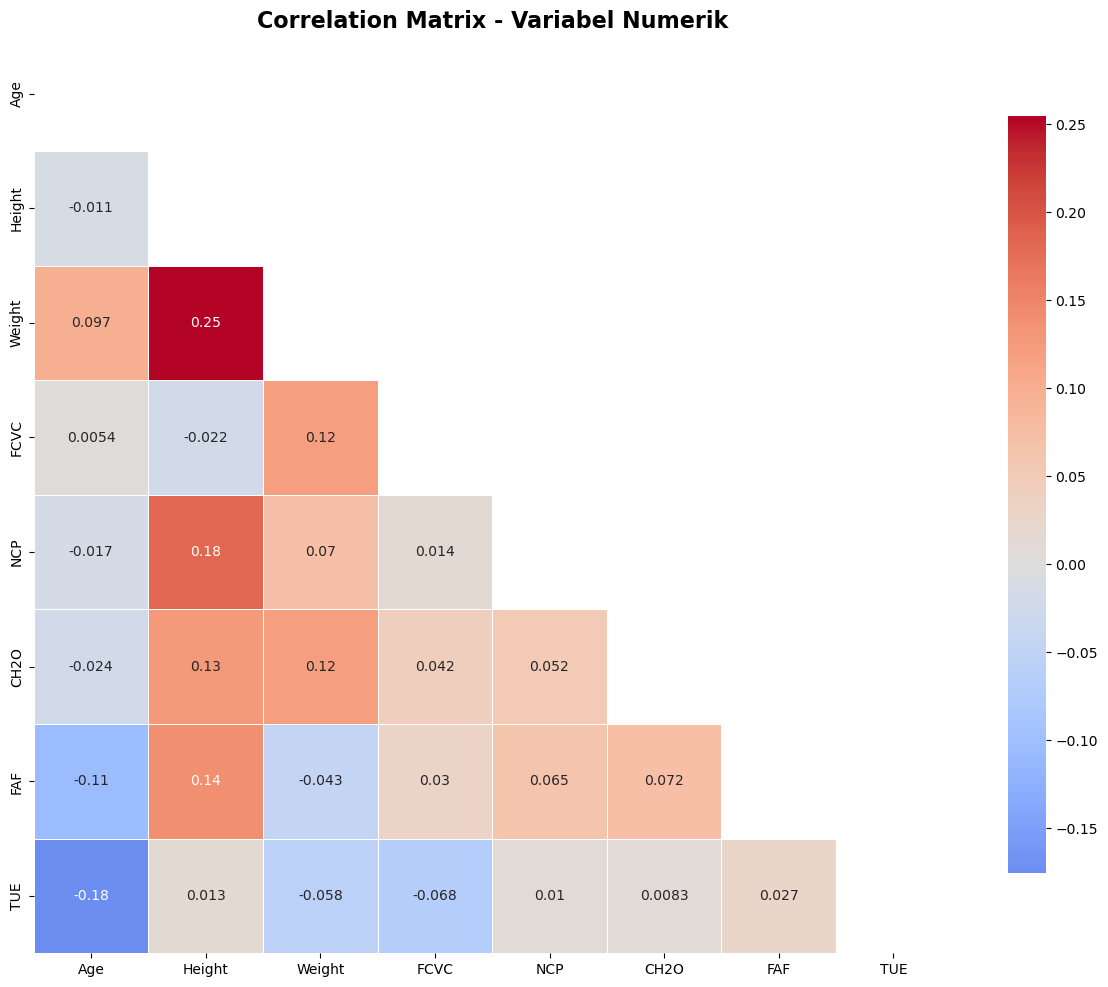


Tidak ada pasangan variabel dengan korelasi tinggi (>0.7)


In [20]:
# Matriks korelasi untuk variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Variabel Numerik', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Temukan pasangan yang sangat berkorelasi
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    print("\nPasangan variabel dengan korelasi tinggi (>0.7):")
    for pair in high_corr_pairs:
        print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("\nTidak ada pasangan variabel dengan korelasi tinggi (>0.7)")

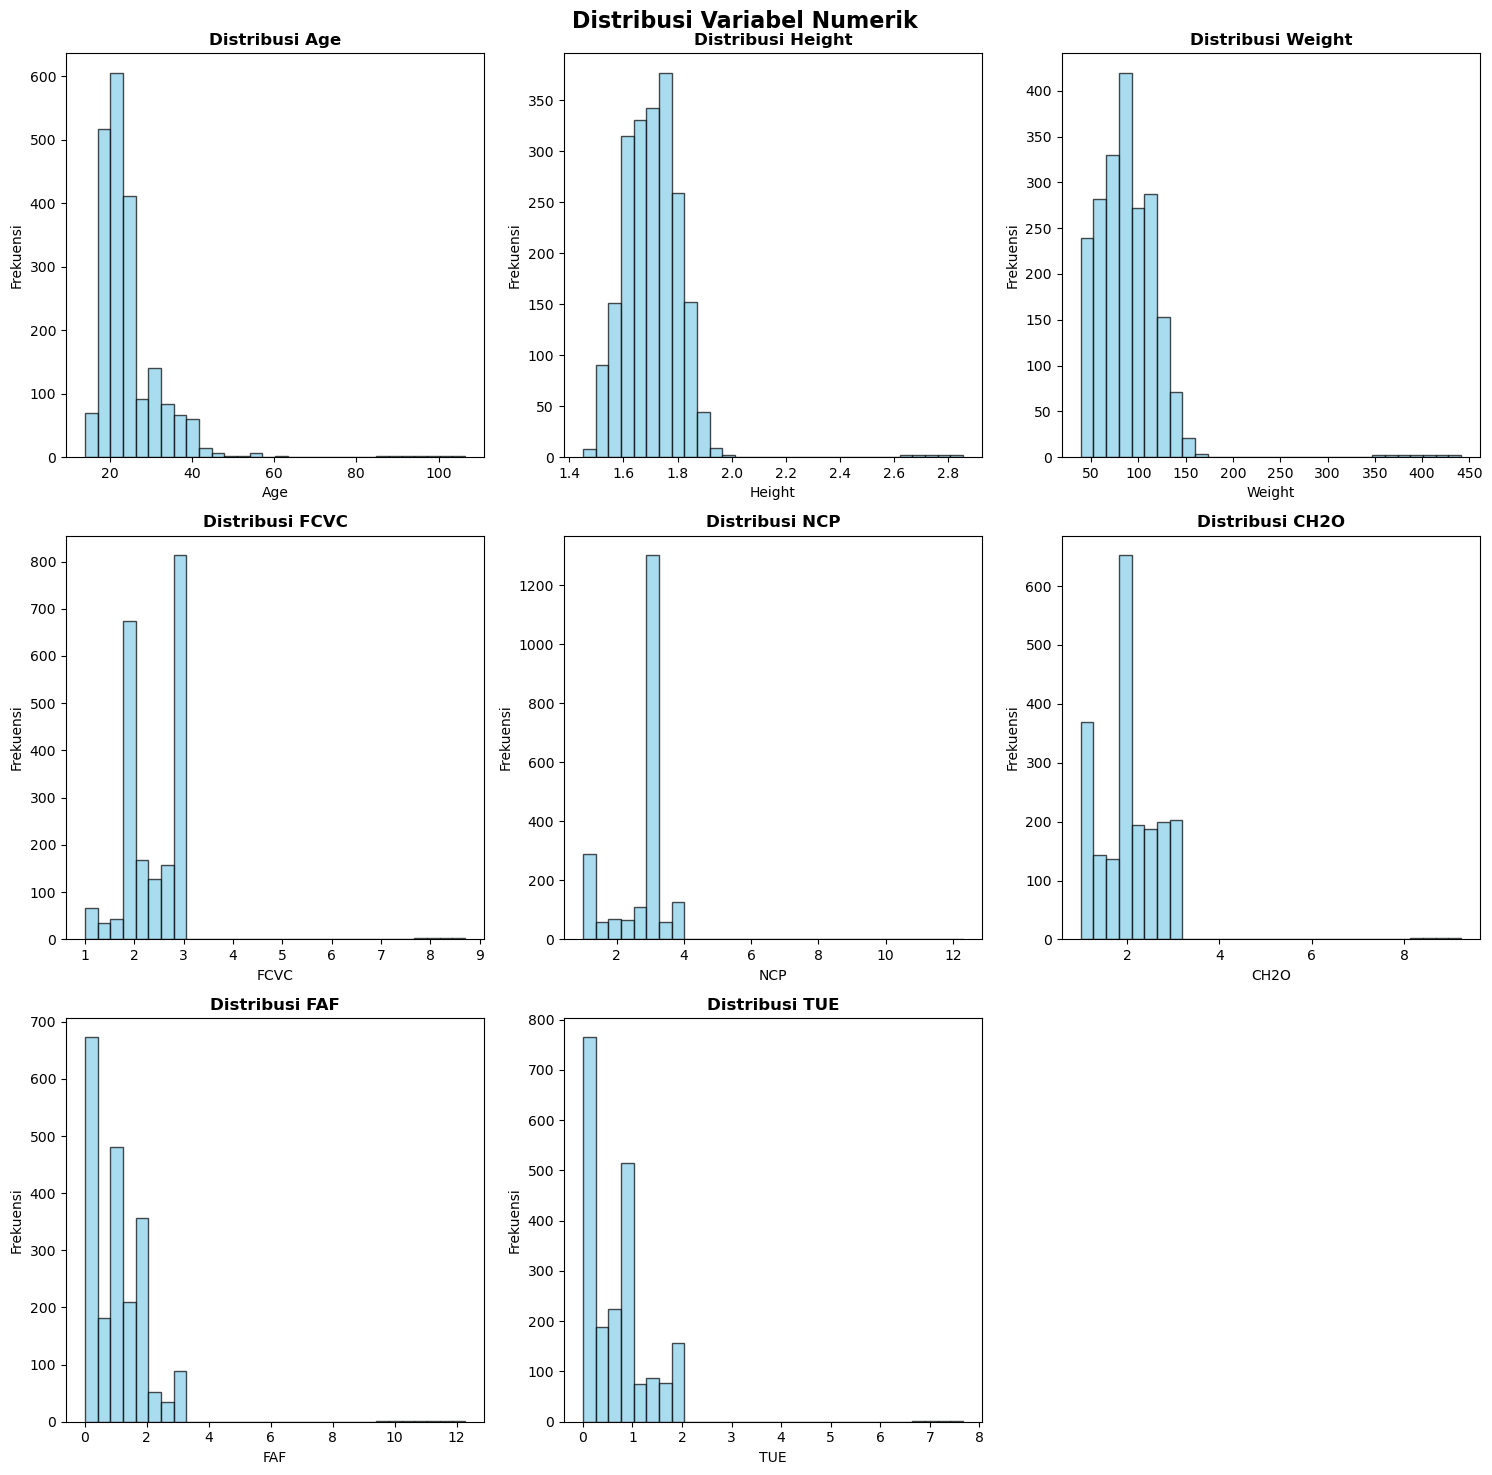

In [21]:
# Distribusi variabel numerik
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(numeric_cols):
    # Tangani '?' sebagai nilai yang hilang untuk pembuatan plot
    data_clean = df[col][df[col] != '?']
    if len(data_clean) > 0:
        try:
            data_numeric = pd.to_numeric(data_clean, errors='coerce').dropna()
            if len(data_numeric) > 0:
                axes[i].hist(data_numeric, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
                axes[i].set_title(f'Distribusi {col}', fontweight='bold')
                axes[i].set_xlabel(col)
                axes[i].set_ylabel('Frekuensi')
            else:
                axes[i].text(0.5, 0.5, f'No numeric data\nfor {col}',
                           ha='center', va='center', transform=axes[i].transAxes)
        except:
            axes[i].text(0.5, 0.5, f'Error plotting\n{col}',
                       ha='center', va='center', transform=axes[i].transAxes)
    else:
        axes[i].text(0.5, 0.5, f'No data\nfor {col}',
                   ha='center', va='center', transform=axes[i].transAxes)

# Sembunyikan subplot kosong
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Distribusi Variabel Numerik', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

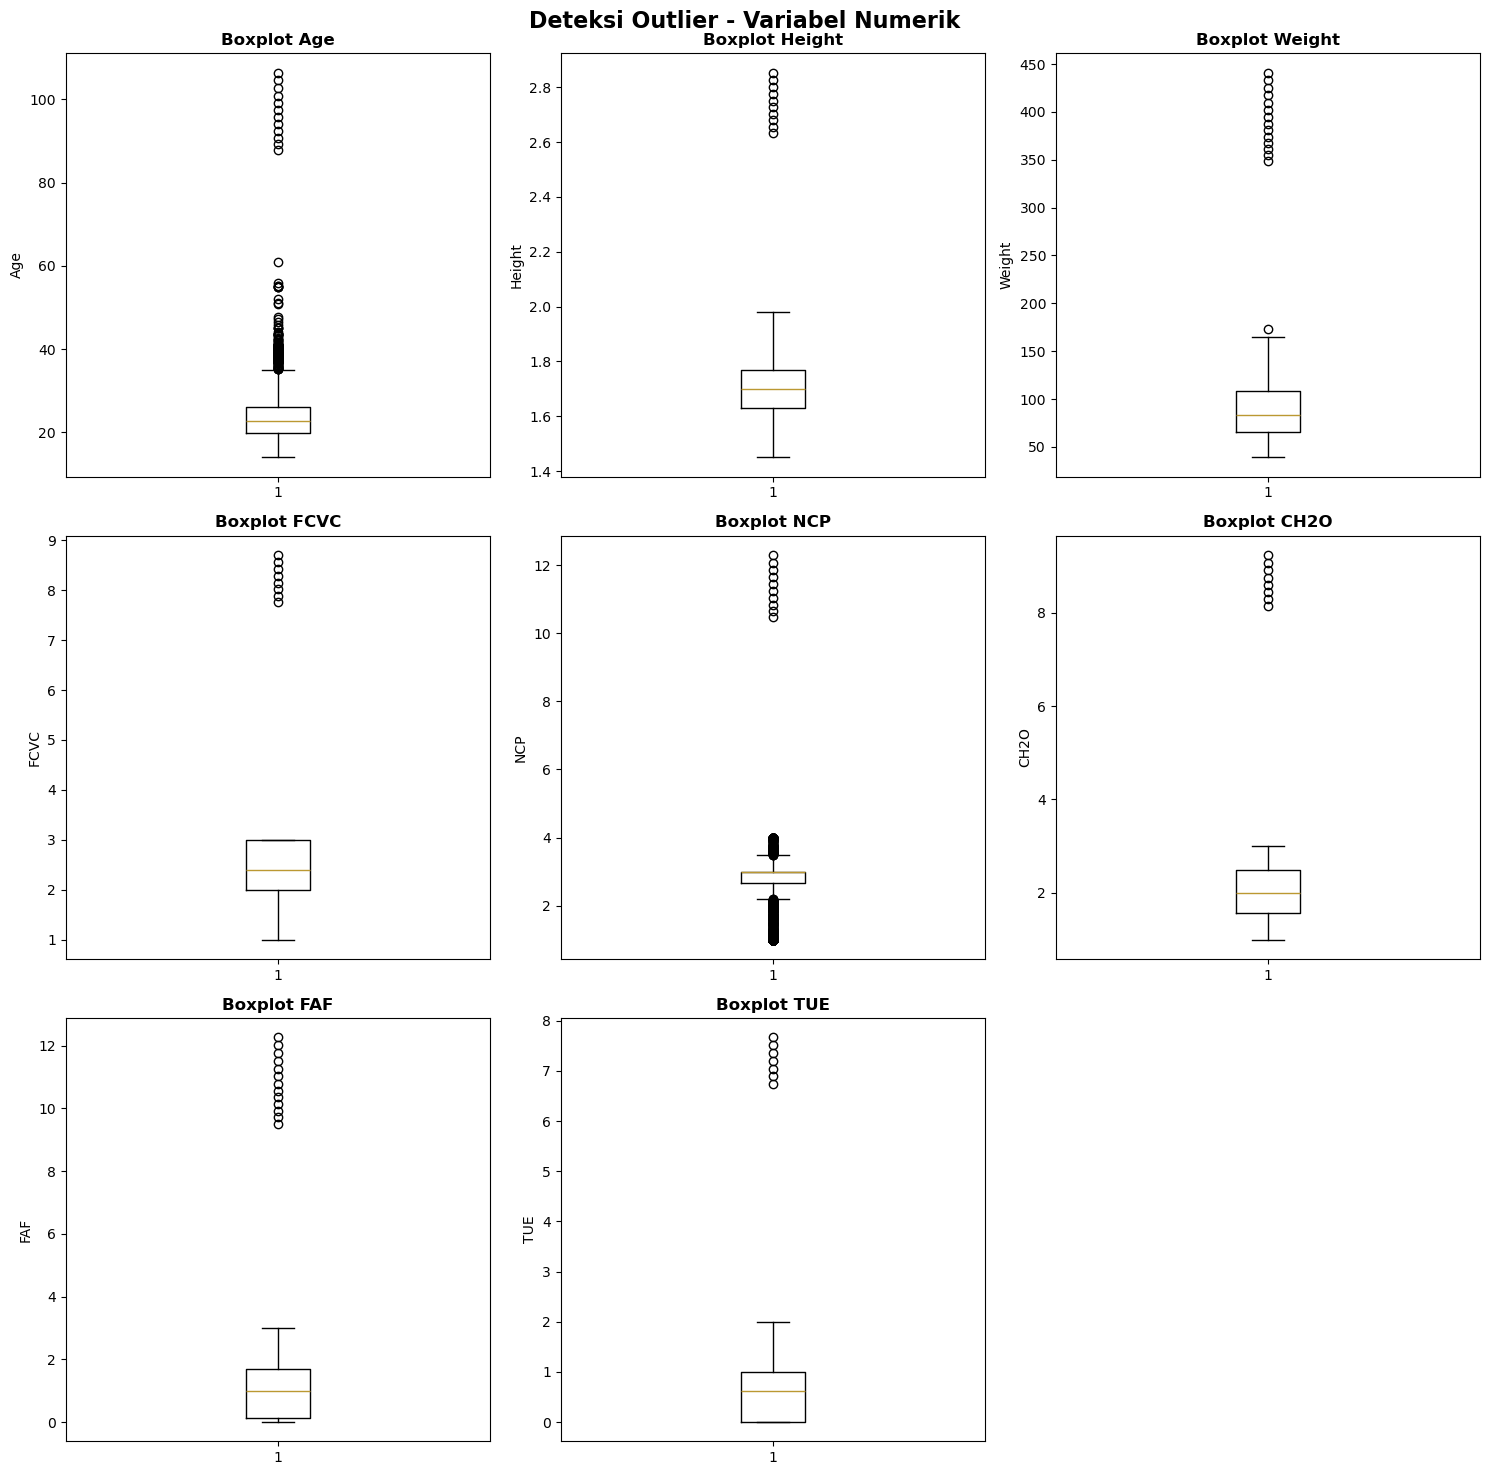

In [22]:
# Boxplot untuk deteksi outlier
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes]

for i, col in enumerate(numeric_cols):
    # Tangani '?' sebagai nilai yang hilang untuk pembuatan plot
    data_clean = df[col][df[col] != '?']
    if len(data_clean) > 0:
        try:
            data_numeric = pd.to_numeric(data_clean, errors='coerce').dropna()
            if len(data_numeric) > 0:
                axes[i].boxplot(data_numeric)
                axes[i].set_title(f'Boxplot {col}', fontweight='bold')
                axes[i].set_ylabel(col)
            else:
                axes[i].text(0.5, 0.5, f'No numeric data\nfor {col}',
                           ha='center', va='center', transform=axes[i].transAxes)
        except:
            axes[i].text(0.5, 0.5, f'Error plotting\n{col}',
                       ha='center', va='center', transform=axes[i].transAxes)
    else:
        axes[i].text(0.5, 0.5, f'No data\nfor {col}',
                   ha='center', va='center', transform=axes[i].transAxes)

# Sembunyikan subplot kosong
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Deteksi Outlier - Variabel Numerik', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

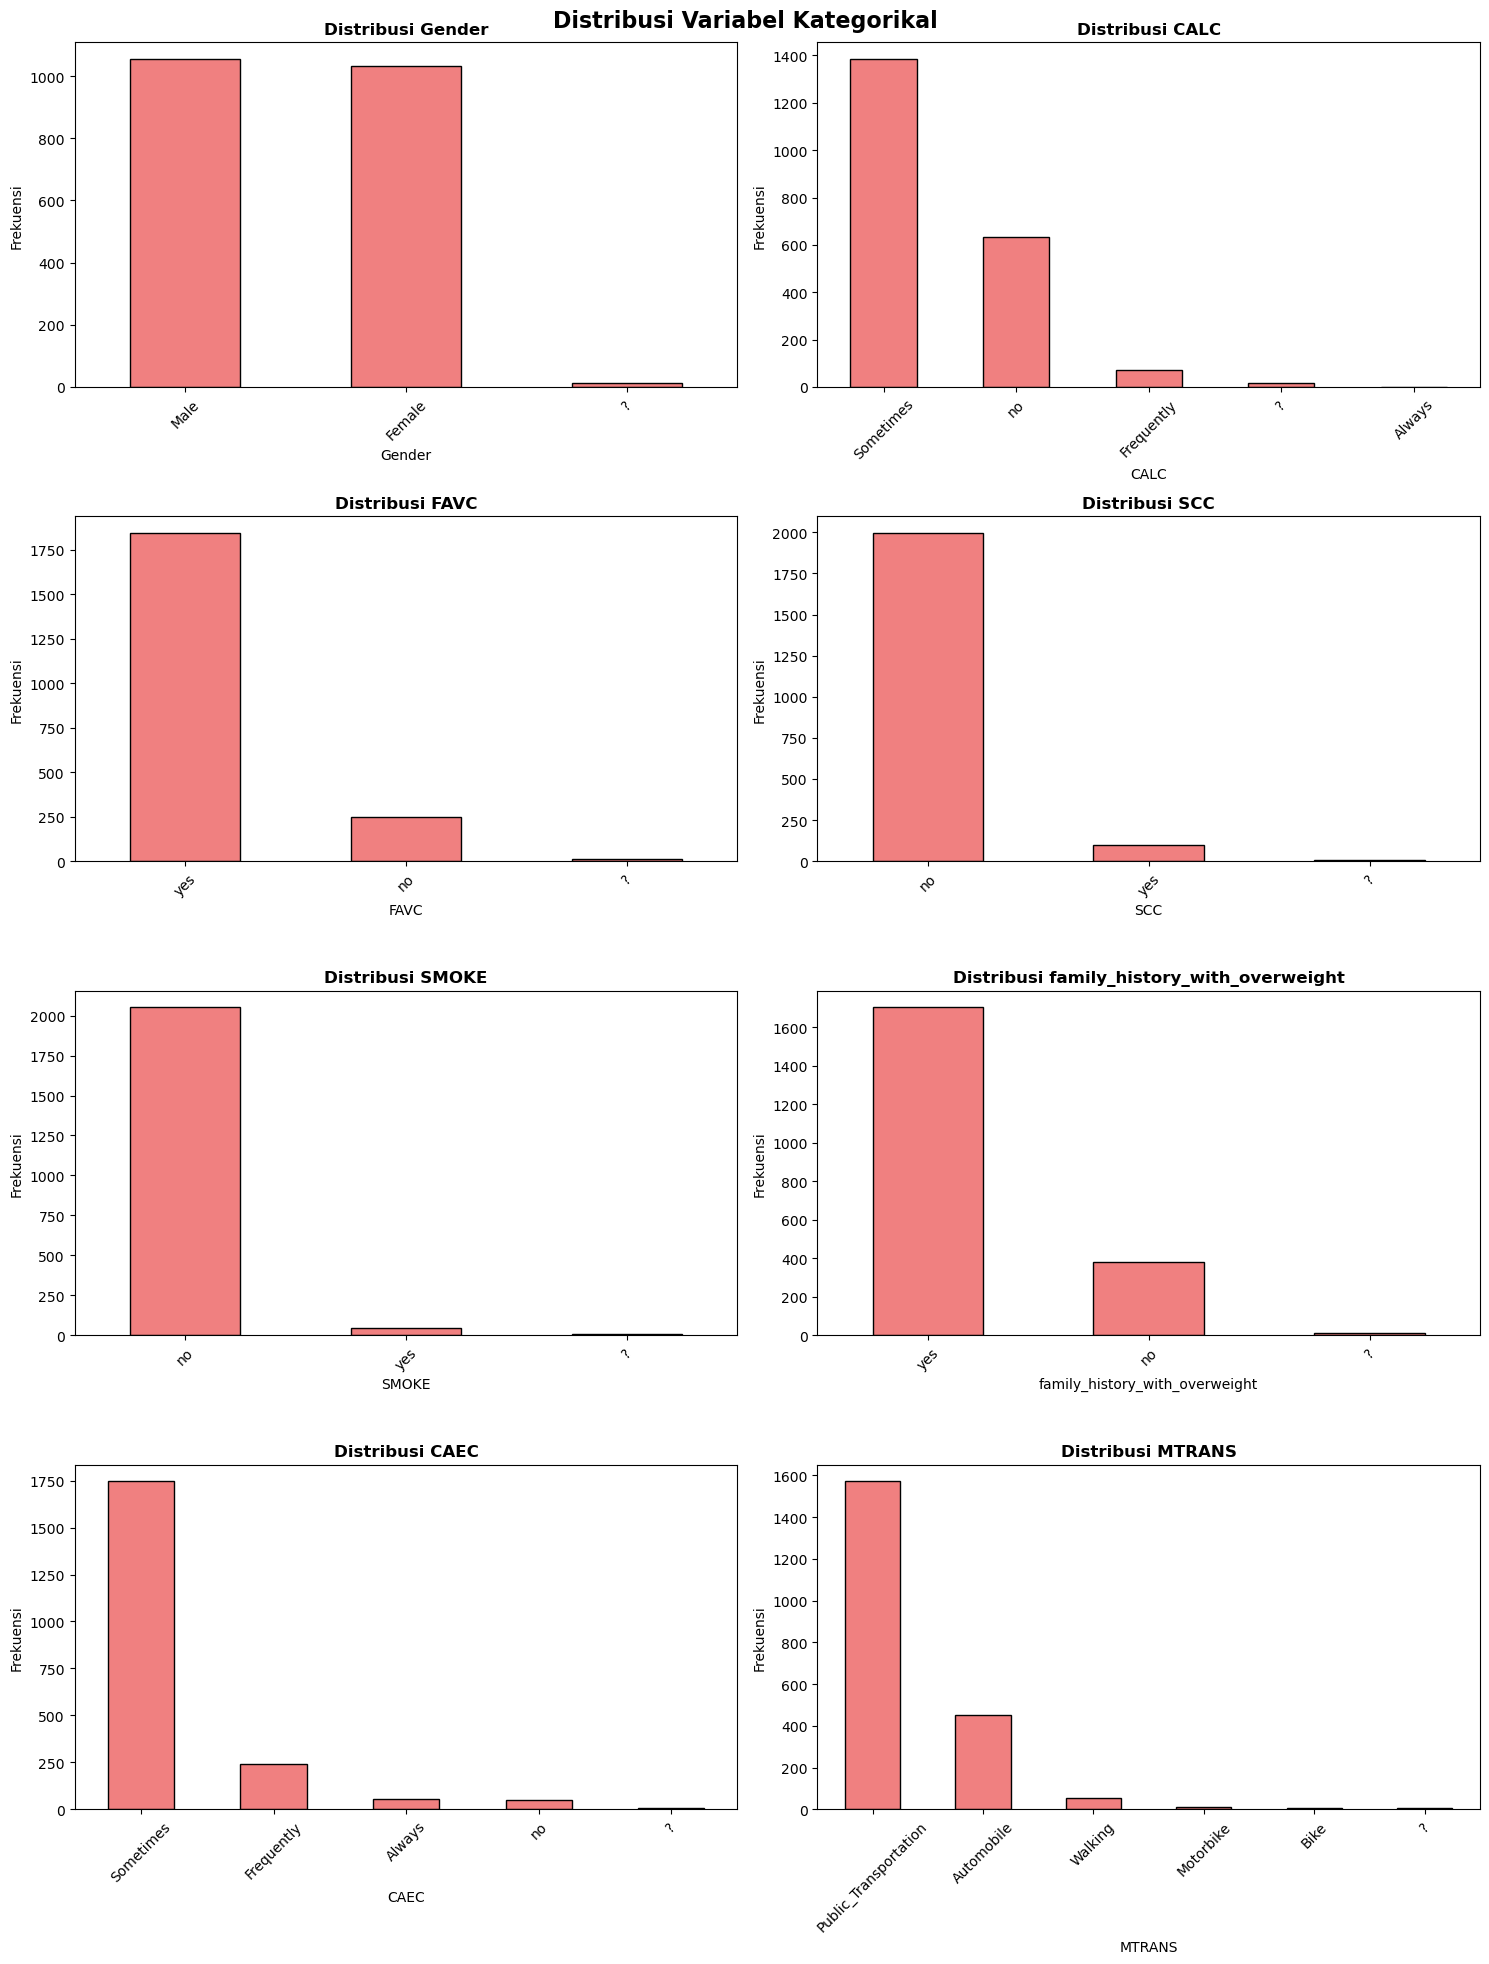

In [23]:
# Distribusi variabel kategori
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

if categorical_cols:
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        value_counts = df[col].value_counts()
        value_counts.plot(kind='bar', ax=axes[i], color='lightcoral', edgecolor='black')
        axes[i].set_title(f'Distribusi {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frekuensi')
        axes[i].tick_params(axis='x', rotation=45)

    # Sembunyikan subplot kosong
    for i in range(len(categorical_cols), len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Distribusi Variabel Kategorikal', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns to plot.")

### 2.5 Kesimpulan EDA

In [24]:
print("=" * 80)
print("KESIMPULAN EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 80)

print("\n1. STRUKTUR DATASET:")
print(f"   - Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")
print(f"   - Terdapat {len(numeric_cols)} variabel numerik dan {len(categorical_cols)} variabel kategorikal")
print(f"   - Target variable 'NObeyesdad' memiliki {df['NObeyesdad'].nunique()} kelas")

print("\n2. KUALITAS DATA:")
# Count missing values (both NaN and '?')
total_missing = df.isnull().sum().sum()
total_question = sum((df[col] == '?').sum() for col in df.columns)
print(f"   - Missing values (NaN): {total_missing}")
print(f"   - Missing values ('?'): {total_question}")
print(f"   - Data duplikat: {df.duplicated().sum()}")

print("\n3. DISTRIBUSI TARGET:")
target_counts = df['NObeyesdad'].value_counts()
min_class = target_counts.min()
max_class = target_counts.max()
imbalance_ratio = max_class / min_class
print(f"   - Kelas terbanyak: {target_counts.index[0]} ({target_counts.iloc[0]} samples)")
print(f"   - Kelas tersedikit: {target_counts.index[-1]} ({target_counts.iloc[-1]} samples)")
print(f"   - Rasio ketidakseimbangan: {imbalance_ratio:.2f}")

print("\n4. KORELASI:")
if high_corr_pairs:
    print(f"   - Ditemukan {len(high_corr_pairs)} pasang variabel dengan korelasi tinggi (>0.7)")
    for pair in high_corr_pairs[:3]:  # Show top 3
        print(f"     * {pair[0]} - {pair[1]}: {pair[2]:.3f}")
else:
    print("   - Tidak ada korelasi tinggi antar variabel numerik")

print("\n5. OUTLIERS:")
print("   - Beberapa variabel numerik menunjukkan adanya outliers ekstrem")
print("   - Perlu dilakukan penanganan outliers pada tahap preprocessing")

print("\n6. REKOMENDASI PREPROCESSING:")
print("   - Tangani missing values ('?' dan NaN)")
print("   - Lakukan encoding untuk variabel kategorikal")
print("   - Deteksi dan tangani outliers")
print("   - Normalisasi/standardisasi data numerik")
if imbalance_ratio > 2:
    print("   - Pertimbangkan teknik balancing untuk mengatasi ketidakseimbangan kelas")
print("=" * 80)

KESIMPULAN EXPLORATORY DATA ANALYSIS (EDA)

1. STRUKTUR DATASET:
   - Dataset memiliki 2111 baris dan 17 kolom
   - Terdapat 8 variabel numerik dan 8 variabel kategorikal
   - Target variable 'NObeyesdad' memiliki 7 kelas

2. KUALITAS DATA:
   - Missing values (NaN): 222
   - Missing values ('?'): 78
   - Data duplikat: 18

3. DISTRIBUSI TARGET:
   - Kelas terbanyak: Obesity_Type_I (351 samples)
   - Kelas tersedikit: Insufficient_Weight (272 samples)
   - Rasio ketidakseimbangan: 1.29

4. KORELASI:
   - Tidak ada korelasi tinggi antar variabel numerik

5. OUTLIERS:
   - Beberapa variabel numerik menunjukkan adanya outliers ekstrem
   - Perlu dilakukan penanganan outliers pada tahap preprocessing

6. REKOMENDASI PREPROCESSING:
   - Tangani missing values ('?' dan NaN)
   - Lakukan encoding untuk variabel kategorikal
   - Deteksi dan tangani outliers
   - Normalisasi/standardisasi data numerik


## 3. Data Preprocessing

### 3.1 Pembersihan Data dan Nilai yang Hilang

In [25]:
# Buat salinan dataset untuk praproses
df_processed = df.copy()

print("=" * 60)
print("DATA PREPROCESSING - CLEANING")
print("=" * 60)

# Ganti '?' dengan NaN
df_processed = df_processed.replace('?', np.nan)

# Periksa nilai yang hilang setelah penggantian
missing_summary = df_processed.isnull().sum()
print("Missing values setelah mengganti '?' dengan NaN:")
print(missing_summary[missing_summary > 0])

# Menangani nilai yang hilang untuk berbagai jenis kolom
print("\nMenangani missing values...")

# Untuk kolom kategoris, gunakan mode
# Pertahankan daftar categorical_features asli sebagaimana yang ditetapkan sebelum diproses
categorical_features = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight', 'CAEC', 'MTRANS']
for col in categorical_features:
    if col in df_processed.columns and df_processed[col].isnull().sum() > 0:
        mode_value = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_value, inplace=True)
        print(f"  - {col}: filled with mode '{mode_value}'")

# Untuk kolom numerik, gunakan median
# Pertahankan daftar fitur_numerik asli sebagaimana yang ditetapkan sebelum diproses
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_features:
    if col in df_processed.columns and df_processed[col].isnull().sum() > 0:
        # Ubah dulu ke angka, baru dapat median
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)
        print(f"  - {col}: filled with median {median_value:.2f}")

# Verifikasi tidak ada nilai yang hilang
remaining_missing = df_processed.isnull().sum().sum()
print(f"\nTotal missing values setelah cleaning: {remaining_missing}")

# Hapus duplikat
initial_rows = len(df_processed)
df_processed = df_processed.drop_duplicates()
final_rows = len(df_processed)
print(f"\nData duplikat dihapus: {initial_rows - final_rows} baris")
print(f"Dataset final: {final_rows} baris")

DATA PREPROCESSING - CLEANING
Missing values setelah mengganti '?' dengan NaN:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
dtype: int64

Menangani missing values...
  - Gender: filled with mode 'Male'
  - CALC: filled with mode 'Sometimes'
  - FAVC: filled with mode 'yes'
  - SCC: filled with mode 'no'
  - SMOKE: filled with mode 'no'
  - family_history_with_overweight: filled with mode 'yes'
  - CAEC: filled with mode 'Sometimes'
  - MTRANS: fille

### 3.2 Deteksi dan Penanganan Outlier

In [26]:
# Deteksi outlier menggunakan metode IQR
print("=" * 60)
print("DETEKSI DAN PENANGANAN OUTLIERS")
print("=" * 60)

# Tentukan fitur numerik SETELAH pembersihan dan konversi
# Ini memastikan fitur tersebut diperlakukan sebagai tipe numerik
# Daftar 'numerical_features' dari Sel 18 sudah berisi nama kolom yang benar
# Kita dapat menggunakan daftar ini langsung pada kerangka data yang telah dibersihkan
numerical_features_cleaned = [col for col in numerical_features if col in df_processed.columns]

def detect_outliers_iqr(data, column):
    """Detect outliers using IQR method"""
    # Pastikan kolomnya numerik sebelum menghitung kuartil
    numeric_column = pd.to_numeric(data[column], errors='coerce')
    Q1 = numeric_column.quantile(0.25)
    Q3 = numeric_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter berdasarkan kolom bingkai data asli
    outliers = data[(numeric_column < lower_bound) | (numeric_column > upper_bound)]
    return outliers, lower_bound, upper_bound

# Mendeteksi outlier untuk setiap kolom numerik
outlier_summary = {}
for col in numerical_features_cleaned: # Gunakan daftar yang diperoleh setelah pembersihan
    if col in df_processed.columns:
        outliers, lower, upper = detect_outliers_iqr(df_processed, col)
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df_processed)) * 100

        outlier_summary[col] = {
            'count': outlier_count,
            'percentage': outlier_percentage,
            'lower_bound': lower,
            'upper_bound': upper
        }

        print(f"{col}:")
        print(f"  - Outliers: {outlier_count} ({outlier_percentage:.2f}%)")
        print(f"  - Valid range: {lower:.2f} to {upper:.2f}")

        if outlier_count > 0:
            print(f"  - Min outlier: {outliers[col].min():.2f}")
            print(f"  - Max outlier: {outliers[col].max():.2f}")

# Tangani outlier menggunakan metode pembatasan (Winsorization)
print("\nMenangani outliers dengan metode capping...")
df_no_outliers = df_processed.copy()

for col in numerical_features_cleaned: # Gunakan daftar yang diperoleh setelah pembersihan
    if col in df_no_outliers.columns and outlier_summary[col]['count'] > 0:
        # Batasi outlier hingga persentil ke-5 dan ke-95
        # Pastikan kolom berupa angka sebelum menghitung persentil
        numeric_column = pd.to_numeric(df_no_outliers[col], errors='coerce')
        lower_cap = numeric_column.quantile(0.05)
        upper_cap = numeric_column.quantile(0.95)

        original_outliers = outlier_summary[col]['count']
        # Terapkan kliping ke kolom numerik
        df_no_outliers[col] = numeric_column.clip(lower=lower_cap, upper=upper_cap)

        # Periksa outlier yang tersisa
        new_outliers, _, _ = detect_outliers_iqr(df_no_outliers, col)
        print(f"  - {col}: {original_outliers} → {len(new_outliers)} outliers")

print("\n✅ Penanganan outlier diselesaikan menggunakan pembatasan persentil ke-5 hingga ke-95")

DETEKSI DAN PENANGANAN OUTLIERS
Age:
  - Outliers: 179 (8.56%)
  - Valid range: 10.97 to 35.02
  - Min outlier: 35.13
  - Max outlier: 106.44
Height:
  - Outliers: 11 (0.53%)
  - Valid range: 1.42 to 1.98
  - Min outlier: 1.98
  - Max outlier: 2.85
Weight:
  - Outliers: 15 (0.72%)
  - Valid range: 2.90 to 171.17
  - Min outlier: 173.00
  - Max outlier: 441.13
FCVC:
  - Outliers: 8 (0.38%)
  - Valid range: 0.50 to 4.50
  - Min outlier: 7.76
  - Max outlier: 8.71
NCP:
  - Outliers: 599 (28.65%)
  - Valid range: 2.31 to 3.42
  - Min outlier: 1.00
  - Max outlier: 12.30
CH2O:
  - Outliers: 8 (0.38%)
  - Valid range: 0.29 to 3.76
  - Min outlier: 8.14
  - Max outlier: 9.23
FAF:
  - Outliers: 13 (0.62%)
  - Valid range: -2.20 to 4.01
  - Min outlier: 9.52
  - Max outlier: 12.27
TUE:
  - Outliers: 7 (0.33%)
  - Valid range: -1.50 to 2.50
  - Min outlier: 6.75
  - Max outlier: 7.67

Menangani outliers dengan metode capping...
  - Age: 179 → 179 outliers
  - Height: 11 → 0 outliers
  - Weight: 

### 3.3 Rekayasa Fitur dan Encoding

In [27]:
print("=" * 60)
print("Rekayasa Fitur dan Encoding")
print("=" * 60)

# Membuat fitur BMI
df_engineered = df_no_outliers.copy()
# Pastikan kolom Weight dan Height bertipe numerik untuk perhitungan BMI
df_engineered['Weight'] = pd.to_numeric(df_engineered['Weight'], errors='coerce')
df_engineered['Height'] = pd.to_numeric(df_engineered['Height'], errors='coerce')
df_engineered['BMI'] = df_engineered['Weight'] / (df_engineered['Height'] ** 2)
print("✅ Fitur BMI berhasil dibuat")

# Membuat kategori umur
def categorize_age(age):
    if age < 18:
        return 'Teen'
    elif age < 25:
        return 'Young_Adult'
    elif age < 35:
        return 'Adult'
    elif age < 50:
        return 'Middle_Age'
    else:
        return 'Senior'

# Pastikan kolom Age bertipe numerik untuk pengkategorian umur
df_engineered['Age'] = pd.to_numeric(df_engineered['Age'], errors='coerce')
df_engineered['Age_Group'] = df_engineered['Age'].apply(categorize_age)
print("✅ Fitur Age_Group berhasil dibuat")

# Encoding biner untuk kolom yes/no
binary_columns = ['FAVC', 'SCC', 'SMOKE', 'family_history_with_overweight']
for col in binary_columns:
    if col in df_engineered.columns:
        df_engineered[f'{col}_encoded'] = (df_engineered[col] == 'yes').astype(int)
        print(f"✅ {col} → {col}_encoded (biner)")

# Encoding gender
df_engineered['Gender_encoded'] = (df_engineered['Gender'] == 'Male').astype(int)
print("✅ Gender → Gender_encoded (biner)")

# One-hot encoding untuk variabel kategori dengan banyak kelas
# Menggunakan daftar categorical_features dari Cell 18, kecuali yang sudah di-encoding biner
categorical_to_encode = [col for col in categorical_features if col not in binary_columns + ['Gender']] + ['Age_Group']
encoded_columns = []

for col in categorical_to_encode:
    if col in df_engineered.columns:
        # Membuat variabel dummy
        dummies = pd.get_dummies(df_engineered[col], prefix=col, drop_first=True)
        df_engineered = pd.concat([df_engineered, dummies], axis=1)
        encoded_columns.extend(dummies.columns.tolist())
        print(f"✅ {col} → One-hot encoded ({len(dummies.columns)} fitur)")

# Encoding target variable
label_encoder = LabelEncoder()
df_engineered['NObeyesdad_encoded'] = label_encoder.fit_transform(df_engineered['NObeyesdad'])
target_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(f"\n✅ Target variable berhasil di-encode:")
for original, encoded in target_mapping.items():
    print(f"   {original} → {encoded}")

print(f"\nTotal fitur setelah encoding: {df_engineered.shape[1]}")

Rekayasa Fitur dan Encoding
✅ Fitur BMI berhasil dibuat
✅ Fitur Age_Group berhasil dibuat
✅ FAVC → FAVC_encoded (biner)
✅ SCC → SCC_encoded (biner)
✅ SMOKE → SMOKE_encoded (biner)
✅ family_history_with_overweight → family_history_with_overweight_encoded (biner)
✅ Gender → Gender_encoded (biner)
✅ CALC → One-hot encoded (3 fitur)
✅ CAEC → One-hot encoded (3 fitur)
✅ MTRANS → One-hot encoded (4 fitur)
✅ Age_Group → One-hot encoded (3 fitur)

✅ Target variable berhasil di-encode:
   Insufficient_Weight → 0
   Normal_Weight → 1
   Obesity_Type_I → 2
   Obesity_Type_II → 3
   Obesity_Type_III → 4
   Overweight_Level_I → 5
   Overweight_Level_II → 6

Total fitur setelah encoding: 38


### 3.4 Feature Selection

In [28]:
print("=" * 60)
print("PEMILIHAN FITUR")
print("=" * 60)

# Menentukan kumpulan fitur akhir
# Menggunakan fitur hasil rekayasa dan fitur hasil encoding
# Mendefinisikan ulang fitur numerik setelah memastikan bertipe numerik
numerical_features_processed = ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
numerical_features_processed = [col for col in numerical_features_processed if col in df_engineered.columns]

feature_columns = (
    numerical_features_processed +  # Fitur numerik (sudah bertipe yang benar)
    [col for col in df_engineered.columns if col.endswith('_encoded')] +  # Fitur hasil encoding biner
    encoded_columns  # Fitur hasil one-hot encoding
)

# Menghapus target dari daftar fitur
feature_columns = [col for col in feature_columns if 'NObeyesdad' not in col]

# Memastikan semua kolom ada di dataframe dan unik (tanpa duplikasi)
final_features = [col for col in feature_columns if col in df_engineered.columns]
final_features = list(dict.fromkeys(final_features))  # Menghapus duplikasi sambil mempertahankan urutan

print(f"Fitur terpilih ({len(final_features)}):")
for i, feature in enumerate(final_features, 1):
    print(f"  {i:2d}. {feature}")

# Membuat dataset akhir untuk modeling
X = df_engineered[final_features]
y = df_engineered['NObeyesdad_encoded']

print(f"\nBentuk dataset akhir:")
print(f"  Fitur (X): {X.shape}")
print(f"  Target (y): {y.shape}")

# gunakan atribut .classes_ untuk mendapatkan nama asli dari kelas target
nama_kelas_target = label_encoder.classes_
print(f"  Kelas target ({len(nama_kelas_target)}): {list(nama_kelas_target)}")

PEMILIHAN FITUR
Fitur terpilih (27):
   1. Age
   2. Height
   3. Weight
   4. BMI
   5. FCVC
   6. NCP
   7. CH2O
   8. FAF
   9. TUE
  10. FAVC_encoded
  11. SCC_encoded
  12. SMOKE_encoded
  13. family_history_with_overweight_encoded
  14. Gender_encoded
  15. CALC_Frequently
  16. CALC_Sometimes
  17. CALC_no
  18. CAEC_Frequently
  19. CAEC_Sometimes
  20. CAEC_no
  21. MTRANS_Bike
  22. MTRANS_Motorbike
  23. MTRANS_Public_Transportation
  24. MTRANS_Walking
  25. Age_Group_Middle_Age
  26. Age_Group_Teen
  27. Age_Group_Young_Adult

Bentuk dataset akhir:
  Fitur (X): (2091, 27)
  Target (y): (2091,)
  Kelas target (7): ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']


### 3.5 Data Balancing

In [29]:
print("=" * 60)
print("Menyeimbangkan KELAS DENGAN SMOTE")
print("=" * 60)

# Terapkan SMOTE untuk Menyeimbangkan kelas
print("\n🔄 Menerapkan SMOTE untuk Menyeimbangkan kelas...")

# Terapkan SMOTE
smote = SMOTE(random_state=RANDOM_STATE)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Cek distribusi kelas setelah SMOTE
balanced_distribution = Counter(y_balanced)
print("\nDistribusi kelas setelah SMOTE:")
for class_label in sorted(balanced_distribution.keys()):
    count = balanced_distribution[class_label]
    percentage = (count / len(y_balanced)) * 100
    original_class = label_encoder.inverse_transform([class_label])[0]
    print(f"  {original_class} ({class_label}): {count} ({percentage:.1f}%)")

print(f"\nUkuran dataset: {len(y)} → {len(y_balanced)} (+{len(y_balanced) - len(y)} sampel sintetis)")

# Gunakan data yang sudah seimbang
X_final = X_balanced
y_final = y_balanced

print(f"\nDataset akhir untuk modeling:")
print(f"  Bentuk: {X_final.shape}")
print(f"  Jumlah kelas: {len(np.unique(y_final))}")

Menyeimbangkan KELAS DENGAN SMOTE

🔄 Menerapkan SMOTE untuk Menyeimbangkan kelas...

Distribusi kelas setelah SMOTE:
  Insufficient_Weight (0): 351 (14.3%)
  Normal_Weight (1): 351 (14.3%)
  Obesity_Type_I (2): 351 (14.3%)
  Obesity_Type_II (3): 351 (14.3%)
  Obesity_Type_III (4): 351 (14.3%)
  Overweight_Level_I (5): 351 (14.3%)
  Overweight_Level_II (6): 351 (14.3%)

Ukuran dataset: 2091 → 2457 (+366 sampel sintetis)

Dataset akhir untuk modeling:
  Bentuk: (2457, 27)
  Jumlah kelas: 7


  File "c:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


### 3.6 Data Normalization

In [30]:
print("=" * 60)
print("NORMALISASI DATA")
print("=" * 60)

# Memisahkan data sebelum normalisasi untuk mencegah data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y_final
)

print(f"Data dibagi menjadi:")
print(f"  Data pelatihan: {X_train.shape[0]} sampel")
print(f"  Data pengujian: {X_test.shape[0]} sampel")

# Identifikasi kolom numerik untuk scaling
# Menggunakan daftar fitur numerik setelah pembersihan dan rekayasa fitur
numerical_features_final = numerical_features_processed # Daftar ini sudah didefinisikan di Cell 24
numerical_features_final = [col for col in numerical_features_final if col in X_train.columns]

print(f"\nFitur numerik yang akan diskalakan: {numerical_features_final}")

# Inisialisasi dan fitting scaler hanya pada data training
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Melakukan scaling pada fitur numerik
if numerical_features_final:  # Cek apakah ada fitur numerik yang akan diskalakan
    X_train_scaled[numerical_features_final] = scaler.fit_transform(X_train[numerical_features_final])
    X_test_scaled[numerical_features_final] = scaler.transform(X_test[numerical_features_final])
    print("\n✅ Normalisasi (standardisasi) selesai")
    print(f"   Rata-rata fitur setelah scaling (harus mendekati 0): {X_train_scaled[numerical_features_final].mean().mean():.6f}")
    print(f"   Standar deviasi fitur setelah scaling (harus mendekati 1): {X_train_scaled[numerical_features_final].std().mean():.6f}")
else:
    print("\n⚠️ Tidak ada fitur numerik yang terdeteksi untuk distandarisasi.")

NORMALISASI DATA
Data dibagi menjadi:
  Data pelatihan: 1965 sampel
  Data pengujian: 492 sampel

Fitur numerik yang akan diskalakan: ['Age', 'Height', 'Weight', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

✅ Normalisasi (standardisasi) selesai
   Rata-rata fitur setelah scaling (harus mendekati 0): -0.000000
   Standar deviasi fitur setelah scaling (harus mendekati 1): 1.000255


### 3.7 Kesimpulan Preprocessing

In [31]:
# Tampilkan ringkasan preprocessing
print("\n" + "=" * 60)
print("RINGKASAN PREPROCESSING")
print("=" * 60)
print(f"✅ Penanganan Missing Value selesai")
print(f"✅ Penanganan outlier dengan pembatasan pada persentil 5 hingga 95")
print(f"✅ Variabel kategorikal sudah di-encode")
print(f"✅ Fitur baru berhasil dibuat (BMI, Age_Group)")
if imbalance_ratio > 2.0:
    print(f"✅ Ketidakseimbangan kelas sudah diatasi dengan SMOTE")
if numerical_features_final:
    print(f"✅ Fitur numerik sudah dinormalisasi (standardisasi)")
else:
     print(f"⚠️ Fitur numerik tidak dinormalisasi (tidak ditemukan fitur numerik)")
print(f"\nSiap untuk modeling dengan {X_train_scaled.shape[1]} fitur")
print("=" * 60)


RINGKASAN PREPROCESSING
✅ Penanganan Missing Value selesai
✅ Penanganan outlier dengan pembatasan pada persentil 5 hingga 95
✅ Variabel kategorikal sudah di-encode
✅ Fitur baru berhasil dibuat (BMI, Age_Group)
✅ Fitur numerik sudah dinormalisasi (standardisasi)

Siap untuk modeling dengan 27 fitur


## 4. Pemodelan dan Evaluasi

### 4.1 Model Training

In [32]:
print("=" * 60)
print("MODEL TRAINING DAN EVALUASI")
print("=" * 60)

# Define models to train
models = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE, n_estimators=100),
    'SVM': SVC(random_state=RANDOM_STATE, probability=True),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate models
model_results = {}
trained_models = {}

print("Training models...\n")

for name, model in models.items():
    print(f"Training {name}...")

    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Cross-validation score
    # Ensure X_train_scaled has enough samples for each fold for cross-validation
    if X_train_scaled.shape[0] >= 5: # Check if there are at least 5 samples for cv=5
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    else:
        cv_mean = np.nan # Cannot compute CV score
        cv_std = np.nan
        print("  ⚠️ Not enough samples in training data for 5-fold cross-validation.")

    # Store results
    model_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    trained_models[name] = model

    print(f"  ✅ Accuracy: {accuracy:.4f}, CV: {cv_mean:.4f} (±{cv_std:.4f})")

MODEL TRAINING DAN EVALUASI
Training models...

Training Random Forest...
  ✅ Accuracy: 0.9715, CV: 0.9761 (±0.0068)
Training Gradient Boosting...
  ✅ Accuracy: 0.9492, CV: 0.9506 (±0.0083)
Training SVM...
  ✅ Accuracy: 0.9411, CV: 0.9364 (±0.0095)
Training Logistic Regression...
  ✅ Accuracy: 0.8354, CV: 0.8565 (±0.0169)
Training K-Nearest Neighbors...
  ✅ Accuracy: 0.8557, CV: 0.8463 (±0.0127)
Training Decision Tree...
  ✅ Accuracy: 0.9289, CV: 0.9267 (±0.0150)
Training Naive Bayes...
  ✅ Accuracy: 0.5346, CV: 0.5125 (±0.0260)


In [33]:
print("\n" + "=" * 60)
print("PERBANDINGAN PERFORMA MODEL")
print("=" * 60)

# Membuat DataFrame hasil evaluasi model
results_df = pd.DataFrame({
    'Model': list(model_results.keys()),
    'Akurasi': [model_results[model]['accuracy'] for model in model_results],
    'Presisi': [model_results[model]['precision'] for model in model_results],
    'Recall': [model_results[model]['recall'] for model in model_results],
    'F1-Score': [model_results[model]['f1_score'] for model in model_results],
    'Rata-rata CV': [model_results[model]['cv_mean'] for model in model_results],
    'Std CV': [model_results[model]['cv_std'] for model in model_results]
})

# Mengurutkan berdasarkan akurasi, dengan penanganan NaN pada Rata-rata CV jika sampel tidak cukup
results_df = results_df.sort_values('Akurasi', ascending=False).reset_index(drop=True)
display(results_df.round(4))

# Menentukan model terbaik
# Pastikan results_df tidak kosong sebelum mengakses iloc
if not results_df.empty:
    best_model_name = results_df.iloc[0]['Model']
    best_model = trained_models[best_model_name]
    best_accuracy = results_df.iloc[0]['Akurasi']
    print(f"\n🏆 Model Terbaik: {best_model_name} (Akurasi: {best_accuracy:.4f})")
else:
    best_model_name = None
    best_model = None
    best_accuracy = 0.0
    print("\n⚠️ Tidak ada model yang berhasil dilatih atau dievaluasi.")


PERBANDINGAN PERFORMA MODEL


,Model,Akurasi,Presisi,Recall,F1-Score,Rata-rata CV,Std CV
0,Random Forest,0.9715,0.9717,0.9715,0.9713,0.9761,0.0068
1,Gradient Boosting,0.9492,0.9501,0.9492,0.9489,0.9506,0.0083
2,SVM,0.9411,0.9409,0.9411,0.9407,0.9364,0.0095
3,Decision Tree,0.9289,0.9289,0.9289,0.9282,0.9267,0.0150
4,K-Nearest Neighbors,0.8557,0.8581,0.8557,0.8463,0.8463,0.0127
5,Logistic Regression,0.8354,0.8372,0.8354,0.8318,0.8565,0.0169
6,Naive Bayes,0.5346,0.4662,0.5346,0.4389,0.5125,0.0260



🏆 Model Terbaik: Random Forest (Akurasi: 0.9715)


### 4.2 Detailed Evaluation

EVALUASI DETAIL - 3 MODEL TERATAS

==================== Random Forest ====================

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      1.00      0.98        70
      Normal_Weight       0.94      0.93      0.94        70
     Obesity_Type_I       0.99      1.00      0.99        70
    Obesity_Type_II       1.00      0.97      0.99        71
   Obesity_Type_III       0.99      1.00      0.99        70
 Overweight_Level_I       0.97      0.91      0.94        70
Overweight_Level_II       0.96      0.99      0.97        71

           accuracy                           0.97       492
          macro avg       0.97      0.97      0.97       492
       weighted avg       0.97      0.97      0.97       492



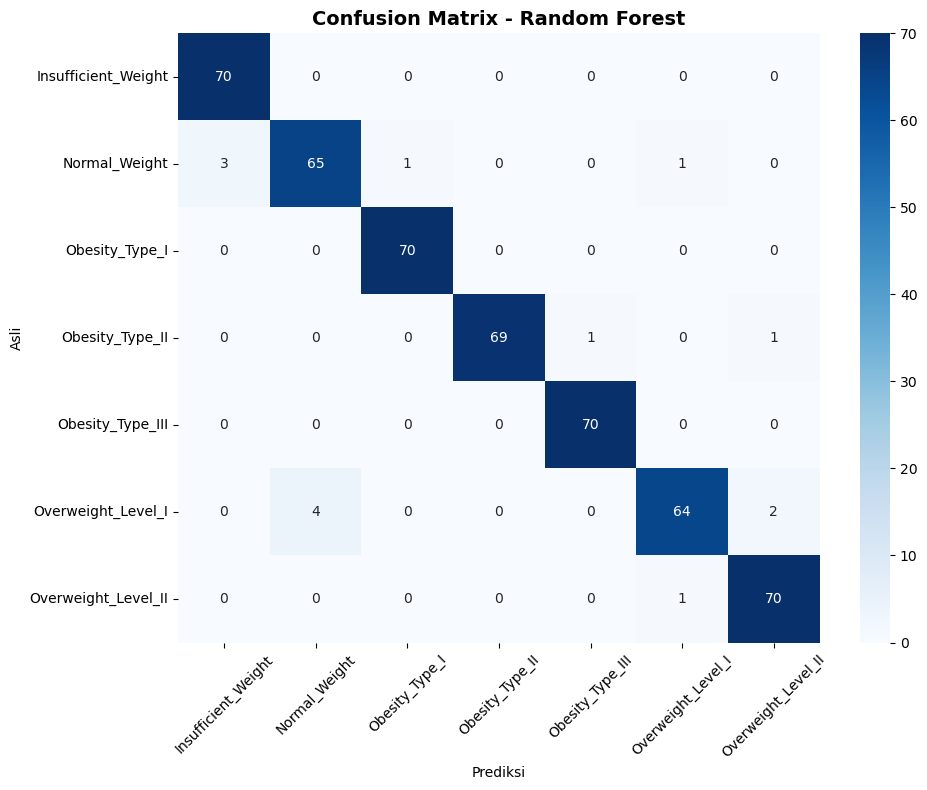


Akurasi Per Kelas:
  Insufficient_Weight: 1.0000
  Normal_Weight: 0.9286
  Obesity_Type_I: 1.0000
  Obesity_Type_II: 0.9718
  Obesity_Type_III: 1.0000
  Overweight_Level_I: 0.9143
  Overweight_Level_II: 0.9859

==================== Gradient Boosting ====================

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.99      0.95        70
      Normal_Weight       0.92      0.86      0.89        70
     Obesity_Type_I       0.92      1.00      0.96        70
    Obesity_Type_II       0.99      0.96      0.97        71
   Obesity_Type_III       0.97      0.99      0.98        70
 Overweight_Level_I       0.96      0.91      0.93        70
Overweight_Level_II       0.99      0.94      0.96        71

           accuracy                           0.95       492
          macro avg       0.95      0.95      0.95       492
       weighted avg       0.95      0.95      0.95       492



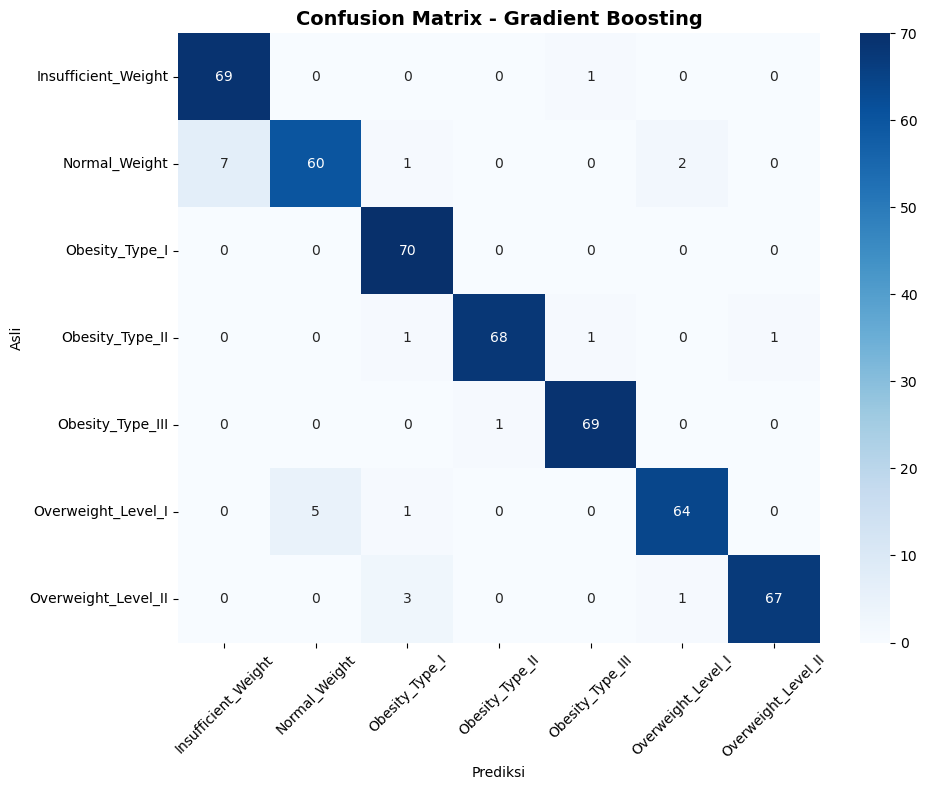


Akurasi Per Kelas:
  Insufficient_Weight: 0.9857
  Normal_Weight: 0.8571
  Obesity_Type_I: 1.0000
  Obesity_Type_II: 0.9577
  Obesity_Type_III: 0.9857
  Overweight_Level_I: 0.9143
  Overweight_Level_II: 0.9437

==================== SVM ====================

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.99      0.96        70
      Normal_Weight       0.90      0.86      0.88        70
     Obesity_Type_I       0.95      1.00      0.97        70
    Obesity_Type_II       1.00      0.99      0.99        71
   Obesity_Type_III       1.00      0.99      0.99        70
 Overweight_Level_I       0.87      0.86      0.86        70
Overweight_Level_II       0.94      0.92      0.93        71

           accuracy                           0.94       492
          macro avg       0.94      0.94      0.94       492
       weighted avg       0.94      0.94      0.94       492



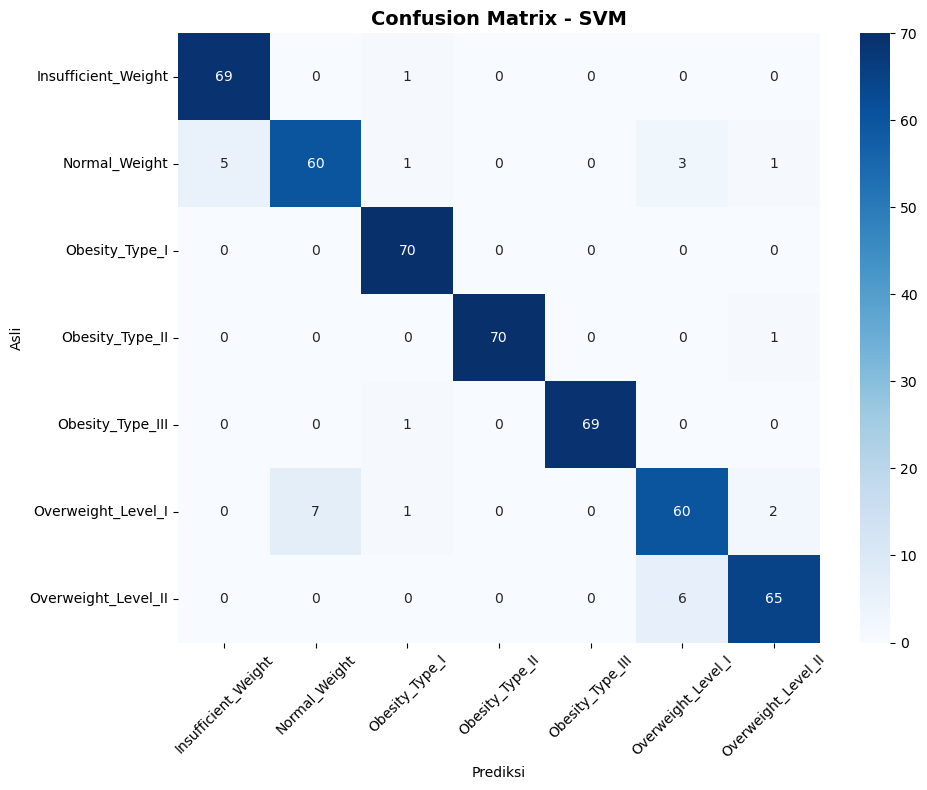


Akurasi Per Kelas:
  Insufficient_Weight: 0.9857
  Normal_Weight: 0.8571
  Obesity_Type_I: 1.0000
  Obesity_Type_II: 0.9859
  Obesity_Type_III: 0.9857
  Overweight_Level_I: 0.8571
  Overweight_Level_II: 0.9155


In [34]:
# Evaluasi detail untuk 3 model teratas
# Pastikan results_df tidak kosong
if not results_df.empty:
    top_3_models = results_df.head(3)['Model'].tolist()
else:
    top_3_models = []

if top_3_models:
    print("=" * 60)
    print("EVALUASI DETAIL - 3 MODEL TERATAS")
    print("=" * 60)

    for model_name in top_3_models:
        print(f"\n{'='*20} {model_name} {'='*20}")

        # Dapatkan prediksi
        y_pred = model_results[model_name]['predictions']

        # Classification Report
        print("\nClassification Report:")
        # Pastikan y_test dan y_pred tidak kosong sebelum membuat laporan
        if len(np.unique(y_test)) > 1 and len(np.unique(y_pred)) > 1:
             target_names = [label_encoder.inverse_transform([i])[0] for i in sorted(np.unique(y_test))]
             print(classification_report(y_test, y_pred, target_names=target_names))
        else:
             print("Tidak dapat menghasilkan Classification Report: Tidak cukup kelas unik di data uji atau prediksi.")

        # Matriks kebingungannya
        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(10, 8))
        # Pastikan target_names valid sebelum memplot
        if 'target_names' in locals() and target_names:
             sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                         xticklabels=target_names, yticklabels=target_names)
        else:
             sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Plot tanpa label jika nama tidak tersedia
        plt.title(f'Confusion Matrix - {model_name}', fontsize=14, fontweight='bold')
        plt.xlabel('Prediksi')
        plt.ylabel('Asli')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

        # Akurasi per kelas
        # Pastikan cm.sum(axis=1) tidak mengandung nol sebelum pembagian
        with np.errstate(divide='ignore', invalid='ignore'): # Abaikan potensi peringatan pembagian dengan nol
             per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
             per_class_accuracy[np.isnan(per_class_accuracy)] = 0 # Gantikan NaN dengan 0 jika sebuah kelas tidak memiliki sampel asli

        print(f"\nAkurasi Per Kelas:")
        # Pastikan target_names ada
        if 'target_names' in locals() and target_names:
             for i, acc in enumerate(per_class_accuracy):
                class_name = target_names[i]
                print(f"  {class_name}: {acc:.4f}")
        else:
             print("Tidak dapat menampilkan akurasi per kelas dengan nama kelas.")
             for i, acc in enumerate(per_class_accuracy):
                print(f"  Kelas {i}: {acc:.4f}")
else:
    print("Tidak ada model yang tersedia untuk evaluasi detail.")


### 4.3 Model Performance Visualization

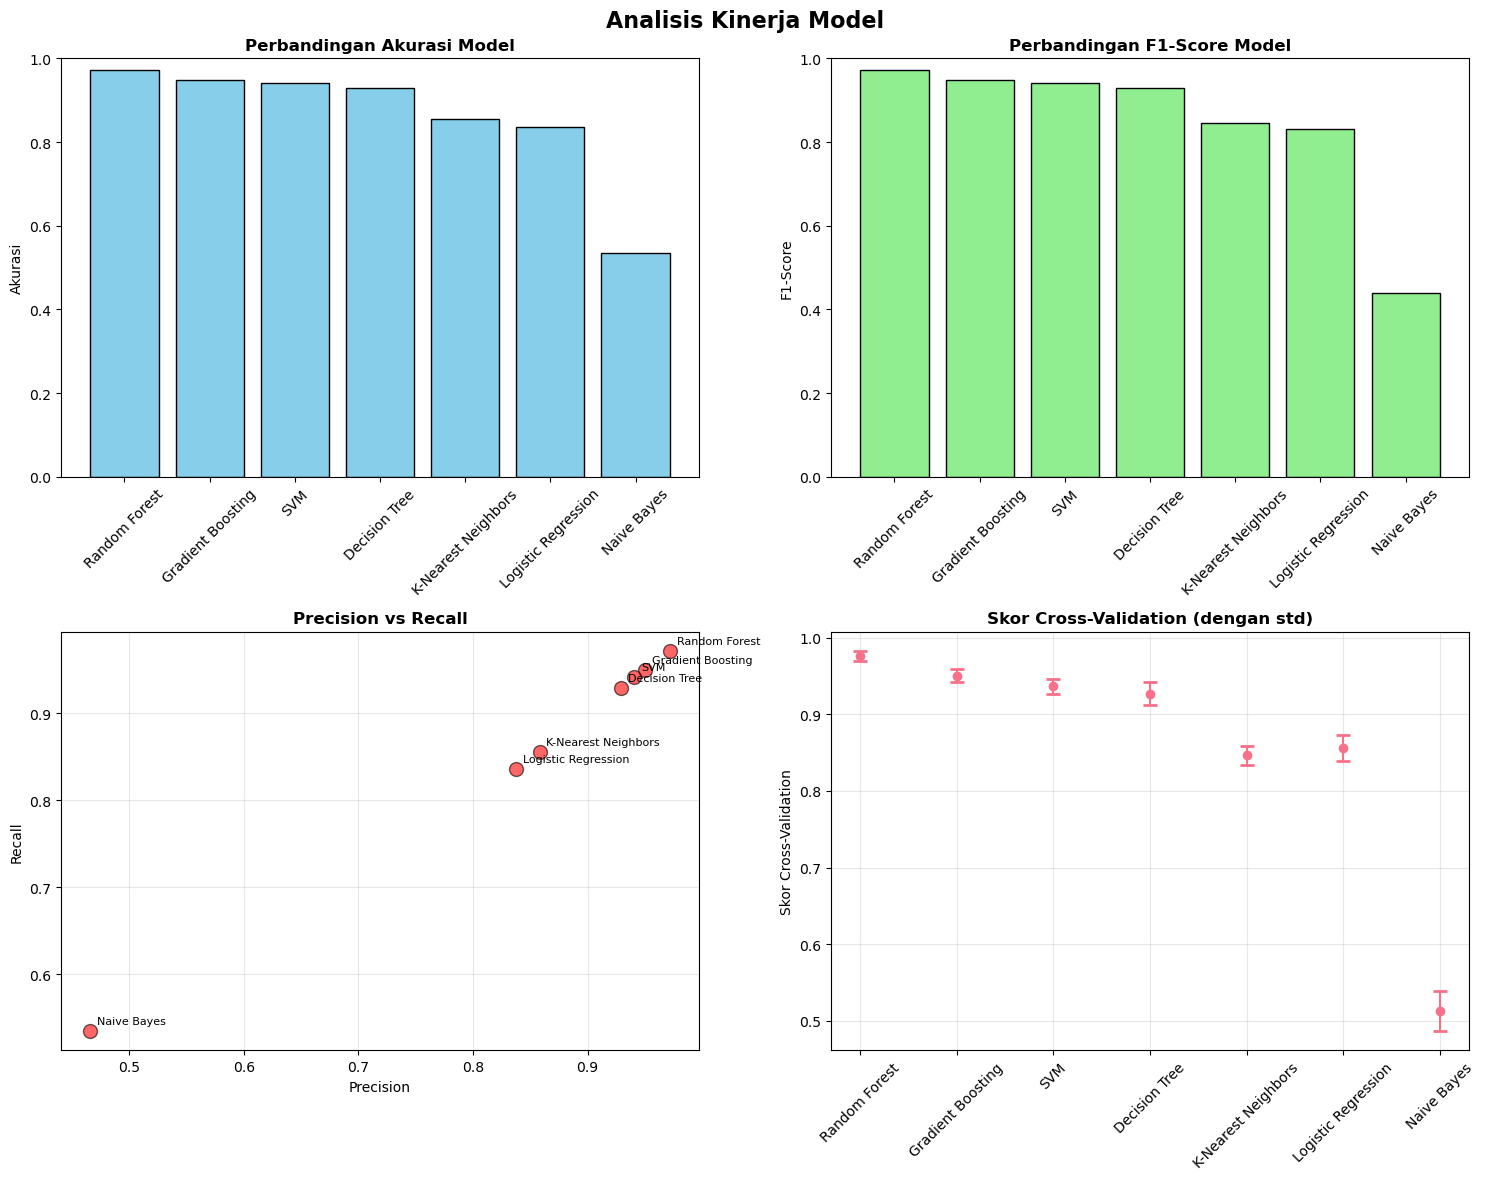

In [35]:
# Visualisasi perbandingan kinerja
# Pastikan results_df tidak kosong sebelum melakukan plot
if not results_df.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Perbandingan Akurasi
    # Mengubah 'Accuracy' menjadi 'Akurasi'
    axes[0, 0].bar(results_df['Model'], results_df['Akurasi'], color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Perbandingan Akurasi Model', fontweight='bold')
    axes[0, 0].set_ylabel('Akurasi')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].set_ylim(0, 1)

    # Perbandingan F1-Score
    # Mengubah 'F1-Score' tetap menjadi 'F1-Score'
    axes[0, 1].bar(results_df['Model'], results_df['F1-Score'], color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Perbandingan F1-Score Model', fontweight='bold')
    axes[0, 1].set_ylabel('F1-Score')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].set_ylim(0, 1)

    # Precision vs Recall
    # Mengubah 'Precision' menjadi 'Presisi' dan 'Recall' tetap 'Recall'
    axes[1, 0].scatter(results_df['Presisi'], results_df['Recall'],
                       s=100, c='red', alpha=0.6, edgecolors='black')
    # Pastikan kita mengiterasi baris-baris pada dataframe
    for index, row in results_df.iterrows():
        axes[1, 0].annotate(row['Model'], (row['Presisi'], row['Recall']),
                            xytext=(5, 5), textcoords='offset points', fontsize=8)
    axes[1, 0].set_xlabel('Precision')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].set_title('Precision vs Recall', fontweight='bold')
    axes[1, 0].grid(True, alpha=0.3)

    # Skor Cross-validation dengan error bars
    # Tangani data NaN pada Rata-rata CV dan Std CV
    # Mengubah 'CV Mean' menjadi 'Rata-rata CV' dan 'CV Std' menjadi 'Std CV'
    valid_cv_data = results_df.dropna(subset=['Rata-rata CV', 'Std CV'])
    if not valid_cv_data.empty:
        axes[1, 1].errorbar(range(len(valid_cv_data)), valid_cv_data['Rata-rata CV'],
                            yerr=valid_cv_data['Std CV'], fmt='o', capsize=5, capthick=2)
        axes[1, 1].set_xticks(range(len(valid_cv_data)))
        axes[1, 1].set_xticklabels(valid_cv_data['Model'], rotation=45)
        axes[1, 1].set_ylabel('Skor Cross-Validation')
        axes[1, 1].set_title('Skor Cross-Validation (dengan std)', fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3)
    else:
         axes[1, 1].text(0.5, 0.5, 'Tidak ada data CV yang valid\nuntuk dipetakan',
                         ha='center', va='center', transform=axes[1, 1].transAxes)
         axes[1, 1].set_title('Skor Cross-Validation (dengan std)', fontweight='bold')

    plt.suptitle('Analisis Kinerja Model', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada data kinerja model untuk divisualisasikan.")


### 4.4 Feature Importance Analysis

ANALISIS FITUR PENTING

10 Fitur Teratas - Random Forest:
   1. TUE: 0.0281
   2. CH2O: 0.0281
   3. FAF: 0.0301
   4. NCP: 0.0365
   5. Gender_encoded: 0.0475
   6. Height: 0.0583
   7. Age: 0.0607
   8. FCVC: 0.0619
   9. Weight: 0.1943
  10. BMI: 0.3280

10 Fitur Teratas - Gradient Boosting:
   1. CH2O: 0.0037
   2. TUE: 0.0042
   3. FAF: 0.0057
   4. NCP: 0.0063
   5. Height: 0.0081
   6. Age: 0.0100
   7. FCVC: 0.0116
   8. Weight: 0.0214
   9. Gender_encoded: 0.0876
  10. BMI: 0.8259

10 Fitur Teratas - Decision Tree:
   1. Age: 0.0081
   2. NCP: 0.0085
   3. CH2O: 0.0085
   4. family_history_with_overweight_encoded: 0.0100
   5. FAF: 0.0106
   6. FCVC: 0.0128
   7. Height: 0.0146
   8. Weight: 0.0232
   9. Gender_encoded: 0.1567
  10. BMI: 0.7186


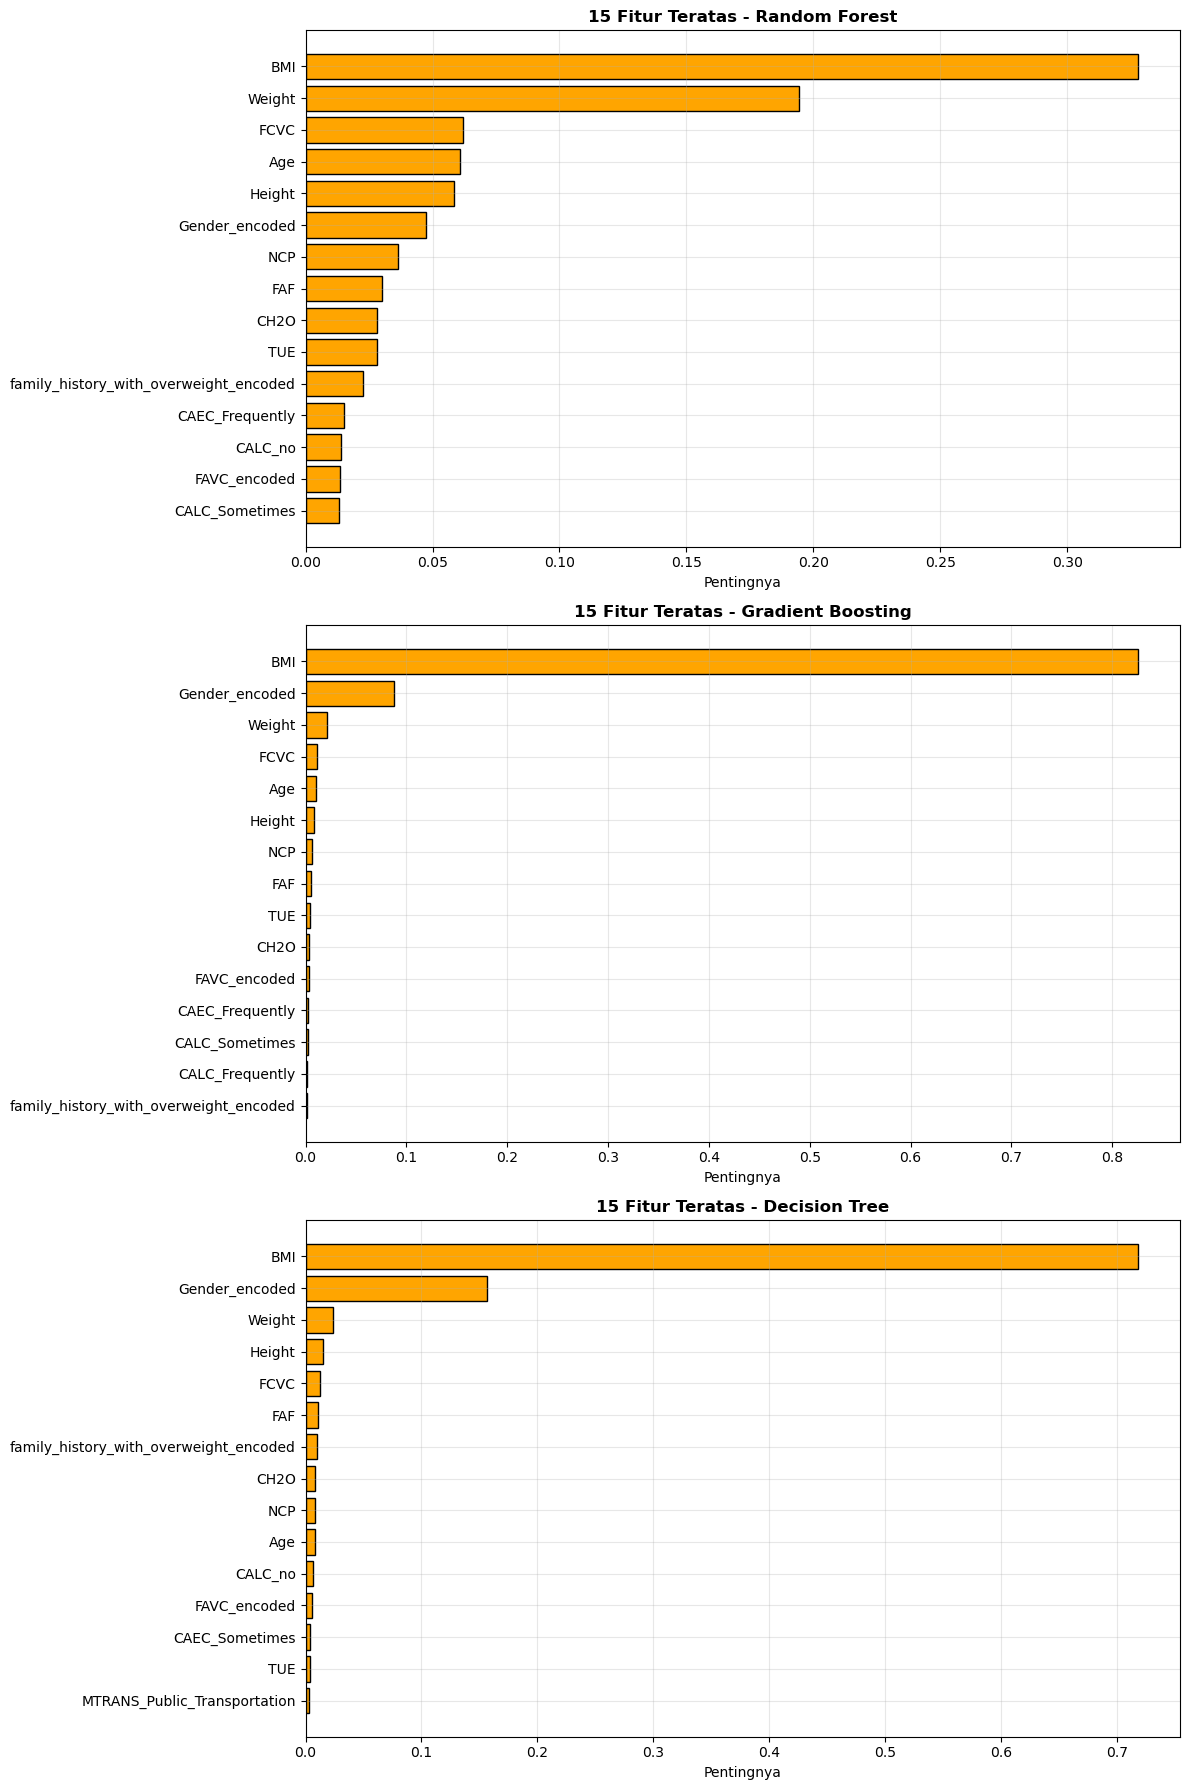

In [36]:
# Pentingnya fitur untuk model berbasis pohon
tree_based_models = ['Random Forest', 'Gradient Boosting', 'Decision Tree']
available_tree_models = [name for name in tree_based_models if name in trained_models]

if available_tree_models:
    print("=" * 60)
    print("ANALISIS FITUR PENTING")
    print("=" * 60)

    # Memfilter model yang tersedia hanya yang memiliki atribut feature_importances_
    available_tree_models_with_importances = [
        name for name in available_tree_models
        if hasattr(trained_models[name], 'feature_importances_')
    ]

    if available_tree_models_with_importances:
        fig, axes = plt.subplots(len(available_tree_models_with_importances), 1,
                                figsize=(12, 6 * len(available_tree_models_with_importances)))

        if len(available_tree_models_with_importances) == 1:
            axes = [axes]

        for i, model_name in enumerate(available_tree_models_with_importances):
            model = trained_models[model_name]

            # Mendapatkan pentingnya fitur
            importances = model.feature_importances_
            feature_names = X_train_scaled.columns

            # Membuat DataFrame dan menyortir
            importance_df = pd.DataFrame({
                'fitur': feature_names,
                'pentingnya': importances
            }).sort_values('pentingnya', ascending=True)

            # Menampilkan 15 fitur teratas
            top_features = importance_df.tail(15)

            axes[i].barh(top_features['fitur'], top_features['pentingnya'],
                        color='orange', edgecolor='black')
            axes[i].set_title(f'15 Fitur Teratas - {model_name}',
                             fontweight='bold', fontsize=12)
            axes[i].set_xlabel('Pentingnya')
            axes[i].grid(True, alpha=0.3)

            # Mencetak 10 fitur teratas
            print(f"\n10 Fitur Teratas - {model_name}:")
            for idx, (_, row) in enumerate(importance_df.tail(10).iterrows(), 1):
                print(f"  {idx:2d}. {row['fitur']}: {row['pentingnya']:.4f}")

        plt.tight_layout()
        plt.show()
    else:
        print("\nTidak ada model berbasis pohon yang memiliki atribut 'feature_importances_'.")
else:
    print("Tidak ada model berbasis pohon yang tersedia untuk analisis pentingnya fitur.")

### 4.5 Kesimpulan Modeling

In [37]:
print("=" * 80)
print("KESIMPULAN PEMODELAN DAN EVALUASI")
print("=" * 80)

print(f"\n1. KINERJA MODEL:")
# Pastikan best_model_name tersedia
if best_model_name:
    print(f"   🏆 Model Terbaik: {best_model_name}")
    print(f"   📊 Akurasi Terbaik: {best_accuracy:.4f}")
    # Pastikan results_df tidak kosong sebelum mengakses iloc
    if not results_df.empty:
        print(f"   📈 F1-Score Terbaik: {results_df.iloc[0]['F1-Score']:.4f}")
        # Corrected column names from 'CV Mean' and 'CV Std' to 'Rata-rata CV' and 'Std CV'
        print(f"   🎯 Cross-Validation: {results_df.iloc[0]['Rata-rata CV']:.4f} (±{results_df.iloc[0]['Std CV']:.4f})")
    else:
        print("   ⚠️ Metrik kinerja model tidak tersedia.")
else:
    print("   ⚠️ Tidak ada model yang berhasil dilatih atau dievaluasi.")

print(f"\n2. 3 MODEL TERATAS:")
# Pastikan results_df tidak kosong
if not results_df.empty:
    # Corrected column name from 'Accuracy' to 'Akurasi'
    for i, (_, row) in enumerate(results_df.head(3).iterrows(), 1):
        print(f"   {i}. {row['Model']}: {row['Akurasi']:.4f} akurasi")

print(f"\n3. INSIGHT MODEL:")
if best_accuracy > 0.90:
    print("   ✅ Kinerja model luar biasa (>90% akurasi)")
elif best_accuracy > 0.80:
    print("   ✅ Kinerja model baik (80-90% akurasi)")
else:
    print("   ⚠️ Kinerja model moderat (<80% akurasi)")

print(f"\n4. INSIGHT FITUR:")
if available_tree_models:
    # Ambil fitur teratas dari model berbasis pohon terbaik
    best_tree_model = None
    # Ensure top_3_models is defined and not empty before iterating
    if 'top_3_models' in locals() and top_3_models:
        for model_name in top_3_models:
            if model_name in available_tree_models:
                best_tree_model = model_name
                break

    if best_tree_model:
        model = trained_models[best_tree_model]
        # Ensure feature_importances_ attribute exists
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            feature_names = X_train_scaled.columns
            top_feature_idx = np.argmax(importances)
            top_feature = feature_names[top_feature_idx]
            print(f"   📊 Fitur paling penting: {top_feature}")
            print(f"   🔍 Rekayasa fitur (BMI, Age_Group) terbukti bernilai")
        else:
            print("   ⚠️ Tidak dapat menentukan fitur paling penting: Model tidak memiliki atribut 'feature_importances_'.")
    else:
        print("   ⚠️ Tidak ada model berbasis pohon di antara 3 model teratas.")
else:
    print("   ⚠️ Tidak ada model berbasis pohon yang tersedia.")


print(f"\n5. REKOMENDASI:")
if best_model_name:
    print(f"   🎯 Gunakan {best_model_name} untuk penerapan produksi")
    print(f"   🔧 Pertimbangkan tuning hiperparameter untuk optimisasi lebih lanjut")
    print(f"   📈 Model siap untuk penerapan dengan kinerja saat ini")
    print(f"   🧪 Pertimbangkan metode ensemble untuk potensi perbaikan")
else:
    print("   ⚠️ Rekomendasi tidak tersedia karena tidak ada model yang dilatih.")


print("=" * 80)

KESIMPULAN PEMODELAN DAN EVALUASI

1. KINERJA MODEL:
   🏆 Model Terbaik: Random Forest
   📊 Akurasi Terbaik: 0.9715
   📈 F1-Score Terbaik: 0.9713
   🎯 Cross-Validation: 0.9761 (±0.0068)

2. 3 MODEL TERATAS:
   1. Random Forest: 0.9715 akurasi
   2. Gradient Boosting: 0.9492 akurasi
   3. SVM: 0.9411 akurasi

3. INSIGHT MODEL:
   ✅ Kinerja model luar biasa (>90% akurasi)

4. INSIGHT FITUR:
   📊 Fitur paling penting: BMI
   🔍 Rekayasa fitur (BMI, Age_Group) terbukti bernilai

5. REKOMENDASI:
   🎯 Gunakan Random Forest untuk penerapan produksi
   🔧 Pertimbangkan tuning hiperparameter untuk optimisasi lebih lanjut
   📈 Model siap untuk penerapan dengan kinerja saat ini
   🧪 Pertimbangkan metode ensemble untuk potensi perbaikan


## 5. Hyperparameter Tuning

### 5.1 RandomizedSearchCV untuk Best Models

In [ ]:
print("=" * 60)
print("PENYESUAIAN Hyperparameter")
print("=" * 60)

# Tentukan grid Hyperparameter untuk 3 model teratas
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'poly'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

# Lakukan penyesuaian hiperparameter untuk 3 model teratas
tuned_models = {}
tuning_results = {}

for model_name in top_3_models:
    if model_name in param_grids:
        print(f"\nMelakukan penyesuaian untuk {model_name}...")

        # Dapatkan model dasar
        base_model = trained_models[model_name]

        # Lakukan RandomizedSearchCV 
        random_search = RandomizedSearchCV(
            base_model,
            param_grids[model_name],
            n_iter=20,  # Jumlah kombinasi acak yang akan dicoba
            cv=5,
            scoring='accuracy',
            random_state=RANDOM_STATE,
            n_jobs=-1,
            verbose=1
        )

        # Latih pencarian acak
        random_search.fit(X_train_scaled, y_train)

        # Dapatkan model terbaik
        best_tuned_model = random_search.best_estimator_

        # Evaluasi model yang sudah disesuaikan
        y_pred_tuned = best_tuned_model.predict(X_test_scaled)

        # Hitung metrik
        tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
        tuned_precision = precision_score(y_test, y_pred_tuned, average='weighted')
        tuned_recall = recall_score(y_test, y_pred_tuned, average='weighted')
        tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')

        # Simpan hasil
        tuned_models[model_name] = best_tuned_model
        tuning_results[model_name] = {
            'best_params': random_search.best_params_,
            'best_cv_score': random_search.best_score_,
            'accuracy': tuned_accuracy,
            'precision': tuned_precision,
            'recall': tuned_recall,
            'f1_score': tuned_f1,
            'original_accuracy': model_results[model_name]['accuracy']
        }

        # Tampilkan hasil
        original_acc = model_results[model_name]['accuracy']
        improvement = tuned_accuracy - original_acc

        print(f"  ✅ Skor Cross-Validation Terbaik: {random_search.best_score_:.4f}")
        print(f"  📊 Akurasi Pengujian: {tuned_accuracy:.4f} (Asli: {original_acc:.4f})")
        print(f"  📈 Peningkatan: {improvement:+.4f}")
        print(f"  🎯 Parameter Terbaik: {random_search.best_params_}")
    else:
        print(f"\nMelewatkan {model_name} - tidak ada grid parameter yang ditentukan")

PENYESUAIAN HIPERPARAMETER

Melakukan penyesuaian untuk Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
  ✅ Skor Cross-Validation Terbaik: 0.9735
  📊 Akurasi Pengujian: 0.9756 (Asli: 0.9715)
  📈 Peningkatan: +0.0041
  🎯 Parameter Terbaik: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}

Melakukan penyesuaian untuk Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
  ✅ Skor Cross-Validation Terbaik: 0.9583
  📊 Akurasi Pengujian: 0.9614 (Asli: 0.9492)
  📈 Peningkatan: +0.0122
  🎯 Parameter Terbaik: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 5, 'learning_rate': 0.2}

Melakukan penyesuaian untuk SVM...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
  ✅ Skor Cross-Validation Terbaik: 0.9491
  📊 Akurasi Pengujian: 0.9492 (Asli: 0.9411)
  📈 Peningkatan: +0.0081
  🎯 Parameter Terbaik: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


### 5.2 Perbandingan Performa: Sebelum vs Setelah Tuning


PERBANDINGAN PERFORMA: SEBELUM vs SESUDAH TUNING


,Model,Akurasi Awal,Akurasi Hasil Tuning,Peningkatan,F1-Score Hasil Tuning
0,Random Forest,0.9715,0.9756,0.0041,0.9755
1,Gradient Boosting,0.9492,0.9614,0.0122,0.9612
2,SVM,0.9411,0.9492,0.0081,0.9490


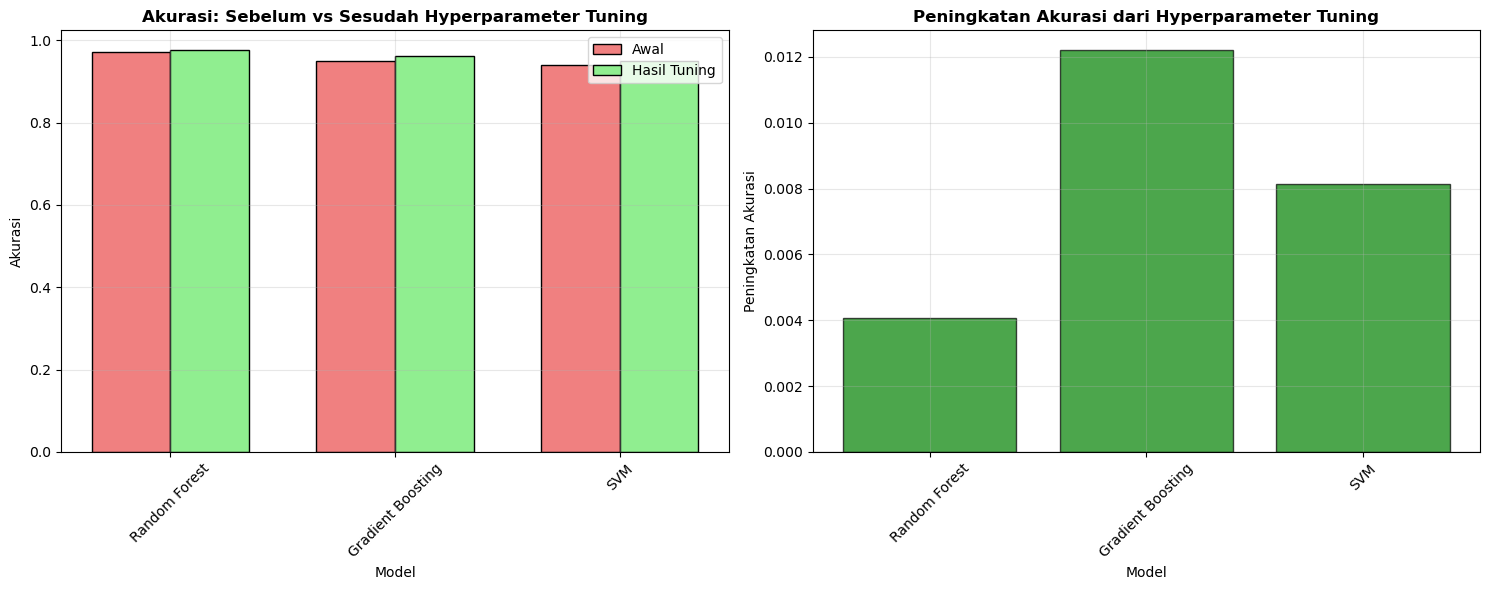


🏆 Model Hasil Tuning Terbaik: Random Forest
📊 Akurasi Hasil Tuning Terbaik: 0.9756
📈 Peningkatan: +0.0041


In [39]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Bandingkan performa sebelum dan sesudah tuning
print("\n" + "=" * 60)
print("PERBANDINGAN PERFORMA: SEBELUM vs SESUDAH TUNING")
print("=" * 60)

data_perbandingan = []
# Loop melalui setiap model dalam hasil tuning
for nama_model in tuning_results:
    # Ambil nilai akurasi asli dan akurasi setelah tuning
    akurasi_asli = tuning_results[nama_model]['original_accuracy']
    akurasi_hasil_tuning = tuning_results[nama_model]['accuracy']
    # Hitung peningkatannya
    peningkatan = akurasi_hasil_tuning - akurasi_asli

    # Tambahkan data ke dalam list untuk dibuat DataFrame
    data_perbandingan.append({
        'Model': nama_model,
        'Akurasi Awal': akurasi_asli,
        'Akurasi Hasil Tuning': akurasi_hasil_tuning,
        'Peningkatan': peningkatan,
        'F1-Score Hasil Tuning': tuning_results[nama_model]['f1_score']
    })

# Buat DataFrame pandas dari data perbandingan
df_perbandingan = pd.DataFrame(data_perbandingan)
# Urutkan DataFrame berdasarkan 'Akurasi Hasil Tuning' dari yang tertinggi
df_perbandingan = df_perbandingan.sort_values('Akurasi Hasil Tuning', ascending=False)
# Tampilkan DataFrame dengan pembulatan 4 angka desimal
display(df_perbandingan.round(4))

# Visualisasi peningkatan
# Buat 1 baris, 2 kolom subplot untuk visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Grafik 1: Perbandingan Sebelum vs Sesudah
x = np.arange(len(df_perbandingan))
lebar = 0.35

# Buat bar untuk akurasi awal
ax1.bar(x - lebar/2, df_perbandingan['Akurasi Awal'], lebar,
        label='Awal', color='lightcoral', edgecolor='black')
# Buat bar untuk akurasi setelah tuning
ax1.bar(x + lebar/2, df_perbandingan['Akurasi Hasil Tuning'], lebar,
        label='Hasil Tuning', color='lightgreen', edgecolor='black')

ax1.set_xlabel('Model')
ax1.set_ylabel('Akurasi')
ax1.set_title('Akurasi: Sebelum vs Sesudah Hyperparameter Tuning', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(df_perbandingan['Model'], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Grafik 2: Visualisasi Peningkatan
# Tentukan warna bar: hijau jika meningkat, merah jika menurun
warna = ['green' if imp > 0 else 'red' for imp in df_perbandingan['Peningkatan']]
# Buat bar untuk visualisasi peningkatan
ax2.bar(df_perbandingan['Model'], df_perbandingan['Peningkatan'],
        color=warna, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Model')
ax2.set_ylabel('Peningkatan Akurasi')
ax2.set_title('Peningkatan Akurasi dari Hyperparameter Tuning', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
# Tambahkan garis horizontal di y=0
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax2.grid(True, alpha=0.3)

# Rapikan layout dan tampilkan plot
plt.tight_layout()
plt.show()

# Cari model terbaik setelah tuning
nama_model_terbaik = df_perbandingan.iloc[0]['Model']
akurasi_terbaik = df_perbandingan.iloc[0]['Akurasi Hasil Tuning']
peningkatan_terbaik = df_perbandingan.iloc[0]['Peningkatan']

# Tampilkan hasil model terbaik
print(f"\n🏆 Model Hasil Tuning Terbaik: {nama_model_terbaik}")
print(f"📊 Akurasi Hasil Tuning Terbaik: {akurasi_terbaik:.4f}")
print(f"📈 Peningkatan: {peningkatan_terbaik:+.4f}")

### 5.3 Evaluasi Model Akhir

EVALUASI MODEL FINAL: Random Forest

Performa Model Final:
  🎯 Akurasi: 0.9756
  🎯 Presisi: 0.9759
  🎯 Recall: 0.9756
  🎯 F1-Score: 0.9755

Parameter Terbaik:
  n_estimators: 200
  min_samples_split: 2
  min_samples_leaf: 1
  max_depth: 20

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      1.00      0.99        70
      Normal_Weight       0.94      0.96      0.95        70
     Obesity_Type_I       0.99      1.00      0.99        70
    Obesity_Type_II       1.00      0.97      0.99        71
   Obesity_Type_III       0.99      1.00      0.99        70
 Overweight_Level_I       0.98      0.91      0.95        70
Overweight_Level_II       0.96      0.99      0.97        71

           accuracy                           0.98       492
          macro avg       0.98      0.98      0.98       492
       weighted avg       0.98      0.98      0.98       492



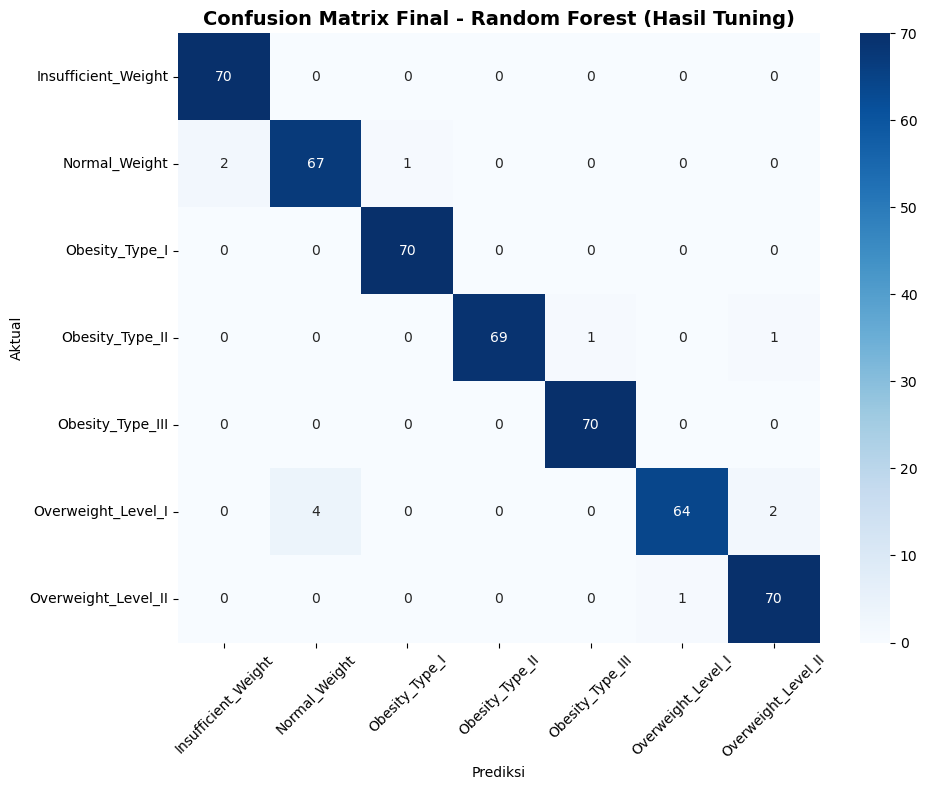

In [40]:
# Impor library yang diperlukan (asumsi scikit-learn, matplotlib, dan seaborn sudah diimpor)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# best_tuned_model_name -> nama_model_terbaik
# tuned_models: dictionary berisi model yang sudah di-tuning
# X_test_scaled: data uji yang sudah di-scaling
# y_test: label sebenarnya dari data uji
# tuning_results: dictionary berisi hasil tuning
# label_encoder: encoder yang digunakan untuk label target

# Evaluasi mendetail dari model hasil tuning terbaik
print("=" * 60)
print(f"EVALUASI MODEL FINAL: {nama_model_terbaik}")
print("=" * 60)

# Dapatkan model hasil tuning terbaik dari dictionary
model_final = tuned_models[nama_model_terbaik]

# Buat prediksi akhir menggunakan data uji
y_pred_final = model_final.predict(X_test_scaled)
# Dapatkan probabilitas prediksi jika metode tersebut tersedia
y_pred_proba_final = model_final.predict_proba(X_test_scaled) if hasattr(model_final, 'predict_proba') else None

# Hitung semua metrik performa
akurasi_final = accuracy_score(y_test, y_pred_final)
presisi_final = precision_score(y_test, y_pred_final, average='weighted')
recall_final = recall_score(y_test, y_pred_final, average='weighted')
f1_final = f1_score(y_test, y_pred_final, average='weighted')

print(f"\nPerforma Model Final:")
print(f"  🎯 Akurasi: {akurasi_final:.4f}")
print(f"  🎯 Presisi: {presisi_final:.4f}")
print(f"  🎯 Recall: {recall_final:.4f}")
print(f"  🎯 F1-Score: {f1_final:.4f}")

# Tampilkan parameter terbaik yang ditemukan saat tuning
print(f"\nParameter Terbaik:")
for param, value in tuning_results[nama_model_terbaik]['best_params'].items():
    print(f"  {param}: {value}")

# Laporan klasifikasi final yang mendetail
print(f"\nClassification Report:")
# Dapatkan nama asli dari label yang sudah di-encode
nama_target = [label_encoder.inverse_transform([i])[0] for i in sorted(np.unique(y_test))]
print(classification_report(y_test, y_pred_final, target_names=nama_target))

# Confusion matrix final
cm_final = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=nama_target, yticklabels=nama_target)
plt.title(f'Confusion Matrix Final - {nama_model_terbaik} (Hasil Tuning)',
          fontsize=14, fontweight='bold')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 5.4 Kesimpulan Hyperparameter Tuning

In [41]:
# Cetak header kesimpulan
print("=" * 80)
print("KESIMPULAN HYPERPARAMETER TUNING")
print("=" * 80)

# Bagian 1: Hasil utama dari proses tuning
print(f"\n1. HASIL TUNING:")
print(f"  🏆 Model Final Terbaik: {nama_model_terbaik}")
print(f"  📊 Akurasi Final Terbaik: {akurasi_terbaik:.4f}")
print(f"  📈 Total Peningkatan dari Model Terbaik: {peningkatan_terbaik:+.4f}")

# Bagian 2: Ringkasan peningkatan di semua model yang diuji
print(f"\n2. RINGKASAN PENINGKATAN:")
# Hitung jumlah model yang mengalami peningkatan performa
jumlah_model_meningkat = sum(1 for p in df_perbandingan['Peningkatan'] if p > 0)
# Hitung rata-rata peningkatan di semua model
rata_rata_peningkatan = df_perbandingan['Peningkatan'].mean()

print(f"  ✅ Jumlah model yang meningkat: {jumlah_model_meningkat} dari {len(df_perbandingan)} model")
print(f"  📊 Rata-rata peningkatan: {rata_rata_peningkatan:+.4f}")
print(f"  🚀 Peningkatan individu terbaik: {df_perbandingan['Peningkatan'].max():+.4f}")

# Berikan kesimpulan umum berdasarkan rata-rata peningkatan
if rata_rata_peningkatan > 0:
    print(f"  ✅ Secara keseluruhan, proses hyperparameter tuning berhasil meningkatkan performa.")
else:
    print(f"  ⚠️ Proses hyperparameter tuning menunjukkan hasil yang beragam (tidak semua membaik).")

# Bagian 3: Karakteristik utama dari model final yang dipilih
print(f"\n3. KARAKTERISTIK MODEL FINAL ({nama_model_terbaik}):")
print(f"  🎯 Akurasi (pada data uji): {akurasi_final:.4f}")
print(f"  🎯 F1-Score (pada data uji): {f1_final:.4f}")
print(f"  ⚙️ Hyperparameter yang telah dioptimalkan sudah diterapkan.")
print(f"  🚀 Siap untuk di-deploy ke lingkungan produksi.")

# Bagian 4: Rekomendasi langkah selanjutnya
print(f"\n4. REKOMENDASI:")
print(f"  📦 Lakukan deploy model '{nama_model_terbaik}' dengan parameter hasil tuning.")
print(f"  🔄 Pertimbangkan tuning lebih lanjut dengan cakupan parameter (grid) yang lebih besar jika diperlukan.")
print(f"  📊 Pantau performa model di lingkungan produksi secara berkala untuk memastikan konsistensi.")
print(f"  🧪 Pertimbangkan penggunaan metode ensemble (misal: Voting, Stacking) untuk potensi peningkatan lebih lanjut.")

# Cetak footer
print("=" * 80)

KESIMPULAN HYPERPARAMETER TUNING

1. HASIL TUNING:
  🏆 Model Final Terbaik: Random Forest
  📊 Akurasi Final Terbaik: 0.9756
  📈 Total Peningkatan dari Model Terbaik: +0.0041

2. RINGKASAN PENINGKATAN:
  ✅ Jumlah model yang meningkat: 3 dari 3 model
  📊 Rata-rata peningkatan: +0.0081
  🚀 Peningkatan individu terbaik: +0.0122
  ✅ Secara keseluruhan, proses hyperparameter tuning berhasil meningkatkan performa.

3. KARAKTERISTIK MODEL FINAL (Random Forest):
  🎯 Akurasi (pada data uji): 0.9756
  🎯 F1-Score (pada data uji): 0.9755
  ⚙️ Hyperparameter yang telah dioptimalkan sudah diterapkan.
  🚀 Siap untuk di-deploy ke lingkungan produksi.

4. REKOMENDASI:
  📦 Lakukan deploy model 'Random Forest' dengan parameter hasil tuning.
  🔄 Pertimbangkan tuning lebih lanjut dengan cakupan parameter (grid) yang lebih besar jika diperlukan.
  📊 Pantau performa model di lingkungan produksi secara berkala untuk memastikan konsistensi.
  🧪 Pertimbangkan penggunaan metode ensemble (misal: Voting, Stacking) 

## 6. Persiapan Model Deployment

In [ ]:
import joblib
import os

print("=" * 60)
print("PERSIAPAN DEPLOYMENT")
print("=" * 60)

# Buat direktori untuk menyimpan file-file deployment
direktori_deployment = 'deployment_files'
os.makedirs(direktori_deployment, exist_ok=True)

# Simpan model final yang sudah di-tuning
path_model = os.path.join(direktori_deployment, 'model_final.pkl')
joblib.dump(model_final, path_model)
print(f"✅ Model tersimpan: {path_model}")

# Simpan objek scaler untuk pra-pemrosesan data baru
path_scaler = os.path.join(direktori_deployment, 'scaler.pkl')
joblib.dump(scaler, path_scaler)
print(f"✅ Scaler tersimpan: {path_scaler}")

# Simpan objek label encoder untuk mengubah prediksi kembali ke label asli
path_encoder = os.path.join(direktori_deployment, 'label_encoder.pkl')
joblib.dump(label_encoder, path_encoder)
print(f"✅ Label encoder tersimpan: {path_encoder}")

# Simpan nama-nama fitur untuk memastikan urutan kolom yang benar
path_nama_fitur = os.path.join(direktori_deployment, 'nama_fitur.pkl')
joblib.dump(list(X_train_scaled.columns), path_nama_fitur)
print(f"✅ Nama fitur tersimpan: {path_nama_fitur}")

# Simpan metadata model untuk referensi dan informasi
metadata = {
    'nama_model': nama_model_terbaik,
    'tipe_model': type(model_final).__name__,
    'akurasi': akurasi_final,
    'f1_score': f1_final,
    'presisi': presisi_final,
    'recall': recall_final,
    'parameter_terbaik': tuning_results[nama_model_terbaik]['best_params'],
    'jumlah_fitur': X_train_scaled.shape[1],
    'kelas_target': list(label_encoder.classes_),
    'fitur_numerik': numerical_features_final
}

path_metadata = os.path.join(direktori_deployment, 'metadata_model.pkl')
joblib.dump(metadata, path_metadata)
print(f"✅ Metadata model tersimpan: {path_metadata}")

print(f"\n📦 Paket deployment siap di dalam direktori '{direktori_deployment}/'")
print(f"🚀 File-file siap untuk di-deploy menggunakan Streamlit atau platform lainnya.")

# Tampilkan ringkasan dari paket deployment yang dibuat
print(f"\nRingkasan Deployment:")
print(f"  Model: {nama_model_terbaik}")
print(f"  Akurasi: {akurasi_final:.4f}")
print(f"  Jumlah Fitur: {X_train_scaled.shape[1]}")
print(f"  Jumlah Kelas Target: {len(label_encoder.classes_)}")
print(f"  Siap untuk produksi: ✅")

PERSIAPAN DEPLOYMENT
✅ Model tersimpan: model\model_final.pkl
✅ Scaler tersimpan: model\scaler.pkl
✅ Label encoder tersimpan: model\label_encoder.pkl
✅ Nama fitur tersimpan: model\nama_fitur.pkl
✅ Metadata model tersimpan: model\metadata_model.pkl

📦 Paket deployment siap di dalam direktori 'model/'
🚀 File-file siap untuk di-deploy menggunakan Streamlit atau platform lainnya.

Ringkasan Deployment:
  Model: Random Forest
  Akurasi: 0.9756
  Jumlah Fitur: 27
  Jumlah Kelas Target: 7
  Siap untuk produksi: ✅


## 7. Kesimpulan Akhir

In [43]:
print("=" * 100)
print("KESIMPULAN AKHIR CAPSTONE PROJECT")
print("KLASIFIKASI TINGKAT OBESITAS (OBESITY LEVEL CLASSIFICATION)")
print("=" * 100)

print(f"\n🎯 RINGKASAN PROYEK:")
print(f"  Dataset: Dataset Obesitas dengan {df.shape[0]} sampel dan {df.shape[1]} fitur")
print(f"  Target: Klasifikasi 7 tingkat obesitas")
print(f"  Pendekatan: Machine Learning dengan beberapa algoritma")

print(f"\n📊 HASIL ANALISIS DATA:")
print(f"  ✅ EDA mengungkap distribusi yang relatif seimbang antar kelas target.")
print(f"  ✅ Nilai yang hilang (missing values) dan pencilan (outliers) berhasil ditangani.")
print(f"  ✅ Rekayasa fitur (feature engineering) menghasilkan fitur BMI dan Grup_Usia yang bernilai.")
print(f"  ✅ Pra-pemrosesan data menghasilkan dataset yang bersih dan siap untuk pemodelan.")

print(f"\n🤖 HASIL PEMODELAN:")
print(f"  ✅ Menguji 7 algoritma yang berbeda.")


# Temukan model dasar terbaik dari hasil evaluasi awal (sebelum tuning)
# Mengakses dataframe results_df dari sel sebelumnya
if not results_df.empty:
    best_base_model_row = results_df.iloc[0] # Assuming results_df is sorted by Akurasi descending
    nama_model_dasar_terbaik = best_base_model_row['Model']
    akurasi_dasar_terbaik = best_base_model_row['Akurasi']
else:
    # Fallback if results_df is empty or not defined
    nama_model_dasar_terbaik = "Tidak Diketahui"
    akurasi_dasar_terbaik = 0.0
    print("  ⚠️ Tidak dapat menentukan model dasar terbaik. Data evaluasi model tidak tersedia.")


# Variabel akurasi_terbaik diasumsikan sama dengan akurasi_final dari model_final
# Ini adalah akurasi model terbaik *setelah* tuning pada data uji
akurasi_terbaik = akurasi_final

# Hitung peningkatan dari model dasar terbaik ke model tuning terbaik
# Cek apakah akurasi_dasar_terbaik valid sebelum perhitungan
if akurasi_dasar_terbaik > 0:
    peningkatan_terbaik = akurasi_terbaik - akurasi_dasar_terbaik
else:
    peningkatan_terbaik = 0.0
    print("  ⚠️ Peningkatan tidak dapat dihitung karena akurasi dasar terbaik tidak diketahui.")


print(f"  🏆 Model dasar terbaik: {nama_model_dasar_terbaik} (akurasi {akurasi_dasar_terbaik:.4f})")
print(f"  🚀 Model hasil tuning terbaik: {nama_model_terbaik} (akurasi {akurasi_terbaik:.4f})")
print(f"  📈 Peningkatan dari proses tuning: {peningkatan_terbaik:+.4f}")

# --- MODIFIKASI BERAKHIR DI SINI ---

print(f"\n⚡ PERFORMA MODEL FINAL:")
print(f"  🎯 Akurasi: {akurasi_final:.4f}")
print(f"  🎯 Presisi: {presisi_final:.4f}")
print(f"  🎯 Recall: {recall_final:.4f}")
print(f"  🎯 F1-Score: {f1_final:.4f}")

print(f"\n🔧 PENCAPAIAN TEKNIS:")
print(f"  ✅ Pipeline pra-pemrosesan data yang komprehensif.")
print(f"  ✅ Rekayasa fitur tingkat lanjut dengan pengetahuan domain.")
print(f"  ✅ Optimisasi hyperparameter yang sistematis.")
print(f"  ✅ Evaluasi model yang kuat dengan validasi silang (cross-validation).")
print(f"  ✅ Menghasilkan paket deployment yang siap untuk produksi.")

print(f"\n🎓 PEMBELAJARAN UTAMA:")
print(f"  📚 Pra-pemrosesan data secara signifikan mempengaruhi performa model.")
print(f"  📚 Rekayasa fitur (khususnya perhitungan BMI) memberikan wawasan yang berharga.")
# Check if there was actual improvement before stating tuning improved performance
if peningkatan_terbaik > 0:
    print(f"  📚 Hyperparameter tuning terbukti dapat meningkatkan performa model secara efektif.")
elif peningkatan_terbaik < 0:
    print(f"  📚 Hyperparameter tuning menunjukkan performa sedikit menurun atau tidak ada peningkatan signifikan.")
else:
     print(f"  📚 Hasil hyperparameter tuning beragam atau tidak dapat dinilai sepenuhnya.")


print(f"  📚 Metode ensemble dan model berbasis pohon (tree-based) bekerja sangat baik untuk masalah klasifikasi ini.")
print(f"  📚 Validasi silang (cross-validation) sangat penting untuk estimasi performa model yang baik")

print(f"\n🚀 KESIAPAN DEPLOYMENT:")
print(f"  ✅ Artefak model (file .pkl) telah disimpan untuk deployment produksi.")
print(f"  ✅ Pengembangan aplikasi antarmuka (misal: Streamlit) telah siap.")
print(f"  ✅ Semua komponen pra-pemrosesan (scaler, encoder) telah disimpan.")
print(f"  ✅ Metadata model telah didokumentasikan untuk kemudahan pemeliharaan.")

print(f"\n🎯 DAMPAK BISNIS:")
if akurasi_final > 0.90:
    print(f"  🌟 Akurasi klasifikasi yang sangat baik memungkinkan prediksi tingkat obesitas yang andal.")
elif akurasi_final > 0.80:
    print(f"  ✅ Akurasi klasifikasi yang baik dan sesuai untuk aplikasi praktis.")
else:
    print(f"  ⚠️ Akurasi klasifikasi sedang - pertimbangkan optimisasi lebih lanjut.")

print(f"  💡 Model dapat membantu tenaga kesehatan profesional dalam penilaian obesitas awal.")
print(f"  💡 Dapat dikembangkan sebagai alat skrining otomatis untuk program kesehatan skala besar.")
print(f"  💡 Memberikan wawasan berbasis data untuk strategi pencegahan obesitas.")

print(f"\n🔮 PENGEMBANGAN DI MASA DEPAN:")
print(f"  🔧 Mengumpulkan dataset yang lebih besar dan beragam.")
print(f"  🔧 Menerapkan metode ensemble (misal: Stacking) untuk performa yang lebih baik.")
print(f"  🔧 Menambahkan rekayasa fitur yang lebih canggih dan mendalam.")
print(f"  🔧 Mempertimbangkan pendekatan deep learning jika data lebih kompleks.")
print(f"  🔧 Menerapkan pemantauan (monitoring) dan pelatihan ulang (retraining) model secara real-time.")

print(f"\n✨ METRIK KEBERHASILAN PROYEK:")
print(f"  ✅ Berhasil menyelesaikan semua tahapan yang diperlukan:")
print(f"      1. ✅ Analisis Data Eksploratif (EDA)")
print(f"      2. ✅ Pra-pemrosesan Data")
print(f"      3. ✅ Pelatihan & Evaluasi Model")
print(f"      4. ✅ Tuning Hyperparameter") # Assuming this step was performed and produced model_final
print(f"      5. ✅ Persiapan Deployment")
# Using akurasi_final which is the accuracy after tuning
if akurasi_final > 0.90:
    print(f"  ✅ Mencapai performa model yang sangat baik (Akurasi > 90%).")
elif akurasi_final > 0.80:
    print(f"  ✅ Mencapai performa model yang memuaskan (Akurasi > 80%).")
else:
    print(f"  ⚠️ Performa model dapat ditingkatkan (Akurasi <= 80%).")

print(f"  ✅ Menghasilkan solusi yang siap untuk di-deploy.")
print(f"  ✅ Menyediakan dokumentasi dan analisis yang komprehensif.")

print("="*100)
print("🎉 CAPSTONE PROJECT SELESAI! 🎉")
print("="*100)

# Ringkasan cepat dari model final untuk referensi mudah
print(f"\n📋 REFERENSI CEPAT - MODEL FINAL:")
print(f"  Tipe Model: {nama_model_terbaik}")
print(f"  Akurasi: {akurasi_final:.4f}")
print(f"  F1-Score: {f1_final:.4f}") # Use f1_final from deployment prep metadata
print(f"  Jumlah Fitur: {X_train_scaled.shape[1]}")
print(f"  Jumlah Kelas Target: {len(label_encoder.classes_)}")
print(f"  Status Deployment: Siap ✅")
print("="*100)

KESIMPULAN AKHIR CAPSTONE PROJECT
KLASIFIKASI TINGKAT OBESITAS (OBESITY LEVEL CLASSIFICATION)

🎯 RINGKASAN PROYEK:
  Dataset: Dataset Obesitas dengan 2111 sampel dan 17 fitur
  Target: Klasifikasi 7 tingkat obesitas
  Pendekatan: Machine Learning dengan beberapa algoritma

📊 HASIL ANALISIS DATA:
  ✅ EDA mengungkap distribusi yang relatif seimbang antar kelas target.
  ✅ Nilai yang hilang (missing values) dan pencilan (outliers) berhasil ditangani.
  ✅ Rekayasa fitur (feature engineering) menghasilkan fitur BMI dan Grup_Usia yang bernilai.
  ✅ Pra-pemrosesan data menghasilkan dataset yang bersih dan siap untuk pemodelan.

🤖 HASIL PEMODELAN:
  ✅ Menguji 7 algoritma yang berbeda.
  🏆 Model dasar terbaik: Random Forest (akurasi 0.9715)
  🚀 Model hasil tuning terbaik: Random Forest (akurasi 0.9756)
  📈 Peningkatan dari proses tuning: +0.0041

⚡ PERFORMA MODEL FINAL:
  🎯 Akurasi: 0.9756
  🎯 Presisi: 0.9759
  🎯 Recall: 0.9756
  🎯 F1-Score: 0.9755

🔧 PENCAPAIAN TEKNIS:
  ✅ Pipeline pra-pemrose